# Imports

## Libraries

In [1]:
### Basic Libraries
# !pip install numpy
import numpy as np
# !pip install pandas
import pandas as pd

### Visualization
# !pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# !pip install seaborn
import seaborn as sns
sns.set()
sns.set_theme(context='talk', palette='Dark2')
# !pip install ipywidgets
from tqdm.notebook import tqdm, trange
tqdm.pandas(desc="Progress")
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

### Sklearn
# !pip install scikit-learn
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, RobustScaler, PowerTransformer #StandardScaler
from sklearn.metrics import confusion_matrix

### Clustering
from scipy.cluster.hierarchy import dendrogram, linkage

### UMAP
# !pip install umap-learn
import umap

### Functions
from utils1 import plot_bar_chart, data_transform
from utils2 import (
    apply_optimal_knnimputer,
    pc_analysis,
    plot_inertia_and_silhouette,
    plot_r2_hc,
    plot_dendrogram,
    clusters_comparison,
    groupby_mean,
    visualize_dimensionality_reduction,
    cluster_profiles
)

### Warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

### Path
temp_path = 'temp\\'

### Autoreload
%load_ext autoreload
%autoreload 2

## Data

In [2]:
data = pd.read_csv('data.csv', index_col=0)

In [3]:
data

,Course area_Art,Course area_Business sciences,Course area_Engineering and related techniques,Course area_Health,Course area_Information and journalism,Course area_Personal services,Course area_Social services,Course area_Teacher training/trainers and education sciences,Course area_Veterinary sciences,Marital status,...,N units taken 2nd period,N scored units 2nd period,N units approved 2nd period,Average grade 2nd period,N unscored units 2nd period,Social Popularity,Course application mode entry score difference,Course average grade 1st period difference,Course average grade 2nd period difference,Technological course
Userid,,,,,,,,,,,,,,,,,,,,,
699,False,False,False,False,False,False,False,False,False,True,...,6.0,11.0,6.0,117.142857,0.0,70.0,6.638542,22.233160,22.374880,True
456,False,False,False,False,False,False,True,False,False,False,...,6.0,15.0,2.0,110.000000,1.0,55.0,-9.080992,1.810133,3.822871,False
647,False,False,False,False,False,False,True,False,False,True,...,6.0,15.0,1.0,100.000000,0.0,67.0,-3.959358,2.143466,-6.177129,False
383,False,False,False,False,False,False,True,False,False,True,...,6.0,12.0,3.0,103.333333,0.0,93.0,-3.959358,-6.523201,-2.843795,False
1217,False,False,False,False,False,False,True,False,False,True,...,6.0,11.0,NaN,120.000000,0.0,43.0,-5.860550,10.143466,13.822871,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4144,False,False,False,True,False,False,False,False,False,True,...,8.0,14.0,7.0,121.500000,0.0,44.0,-11.291489,20.656294,23.840012,False
2761,False,False,False,True,False,False,False,False,False,True,...,8.0,10.0,NaN,133.062500,0.0,76.0,0.243258,5.818307,9.515718,False
4410,False,True,False,False,False,False,False,False,False,False,...,5.0,6.0,5.0,143.333333,0.0,34.0,-5.195787,49.001552,48.279857,False


In [4]:
# Demographic Traits
demographic_cols = [
    'Marital status', 
    'Nationality', 
    'Mother\'s qualification', 
    'Father\'s qualification', 
    'Mother\'s occupation', 
    'Father\'s occupation', 
    'Gender_Male', 
    'Age at enrollment', 
    'International', 
    'Displaced', 
    'Special needs',
    'Social Popularity'
]

# Academic Performance
performance_cols = [
    'Previous qualification',
    'Previous qualification score',
    'Entry score',
    'N units credited 1st period',
    'N units taken 1st period',
    'N scored units 1st period',
    'N units approved 1st period',
    'Average grade 1st period',
    'N unscored units 1st period',
    'N units credited 2nd period',
    'N units taken 2nd period',
    'N scored units 2nd period',
    'N units approved 2nd period',
    'Average grade 2nd period',
    'N unscored units 2nd period',
    'Course application mode entry score difference',
    'Course average grade 1st period difference',
    'Course average grade 2nd period difference'
]

# Financial Traits
financial_cols = [
    'Debtor',
    'Regularized Fees',
    'External Funding',
]

# Course/Program Details
course_cols = [
    'Course area_Art', 
    'Course area_Business sciences', 
    'Course area_Engineering and related techniques', 
    'Course area_Health', 
    'Course area_Information and journalism', 
    'Course area_Personal services', 
    'Course area_Social services', 
    'Course area_Teacher training/trainers and education sciences', 
    'Course area_Veterinary sciences', 
    'Application mode', 
    'Application order',
    'Morning shift participation',
    'Technological course'
]

# Data Preparation

## Scaling

In [5]:
data_no = data.copy()
data_mm = data_transform(MinMaxScaler(), data)[0]
data_rb = data_transform(RobustScaler(), data)[0]
data_yj = data_transform(PowerTransformer(), data)[0]

## Missing Values Imputation

In [6]:
# # Get the optimal KNNImputer and impute the missing data
# # Default values for n_neighbors and weights are 5 and 'uniform', respectively
# print('NO SCALING')
# data_no = apply_optimal_knnimputer(data_no, 2, 30, True, 'data_no')

# print('\nMINMAX SCALER')
# data_mm = apply_optimal_knnimputer(data_mm, 2, 30, True, 'data_mm')

# print('\nROBUST SCALER')
# data_rb = apply_optimal_knnimputer(data_rb, 2, 30, True, 'data_rb')

# print('\nPOWER TRANSFORMER')
# data_yj = apply_optimal_knnimputer(data_yj, 2, 30, True, 'data_yj')

In [7]:
data_no = pd.read_csv(temp_path + 'imputed_data\\data_no.csv', index_col=0)
data_mm = pd.read_csv(temp_path + 'imputed_data\\data_mm.csv', index_col=0)
data_rb = pd.read_csv(temp_path + 'imputed_data\\data_rb.csv', index_col=0)
data_yj = pd.read_csv(temp_path + 'imputed_data\\data_yj.csv', index_col=0)

# PCA

NO SCALING
Number of columns: 2


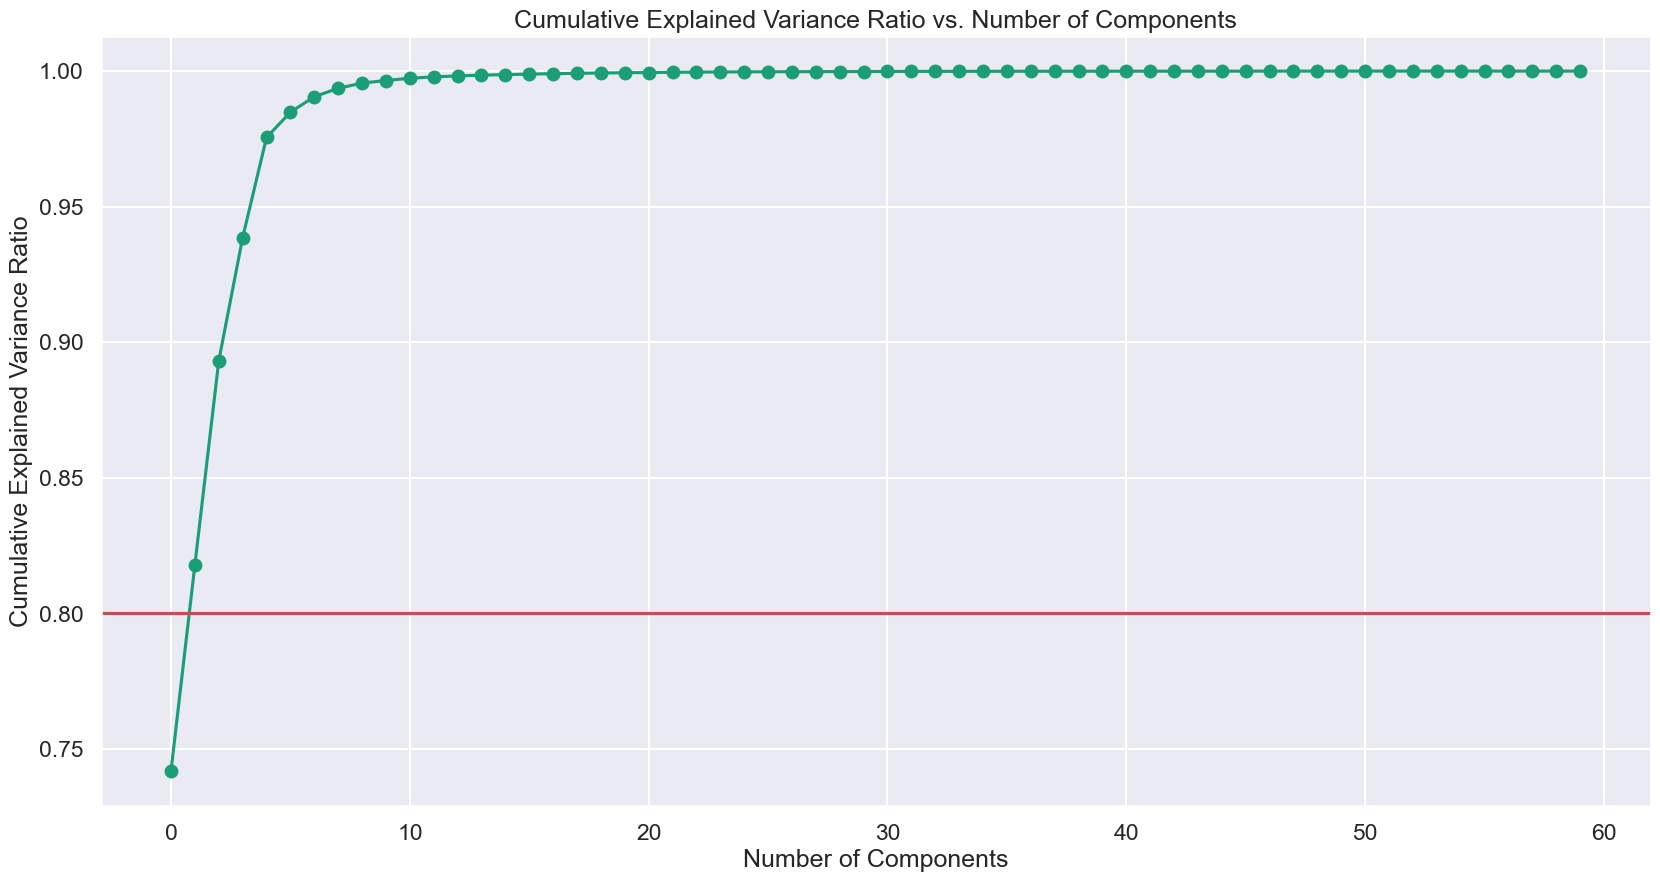


MINMAX SCALER
Number of columns: 17


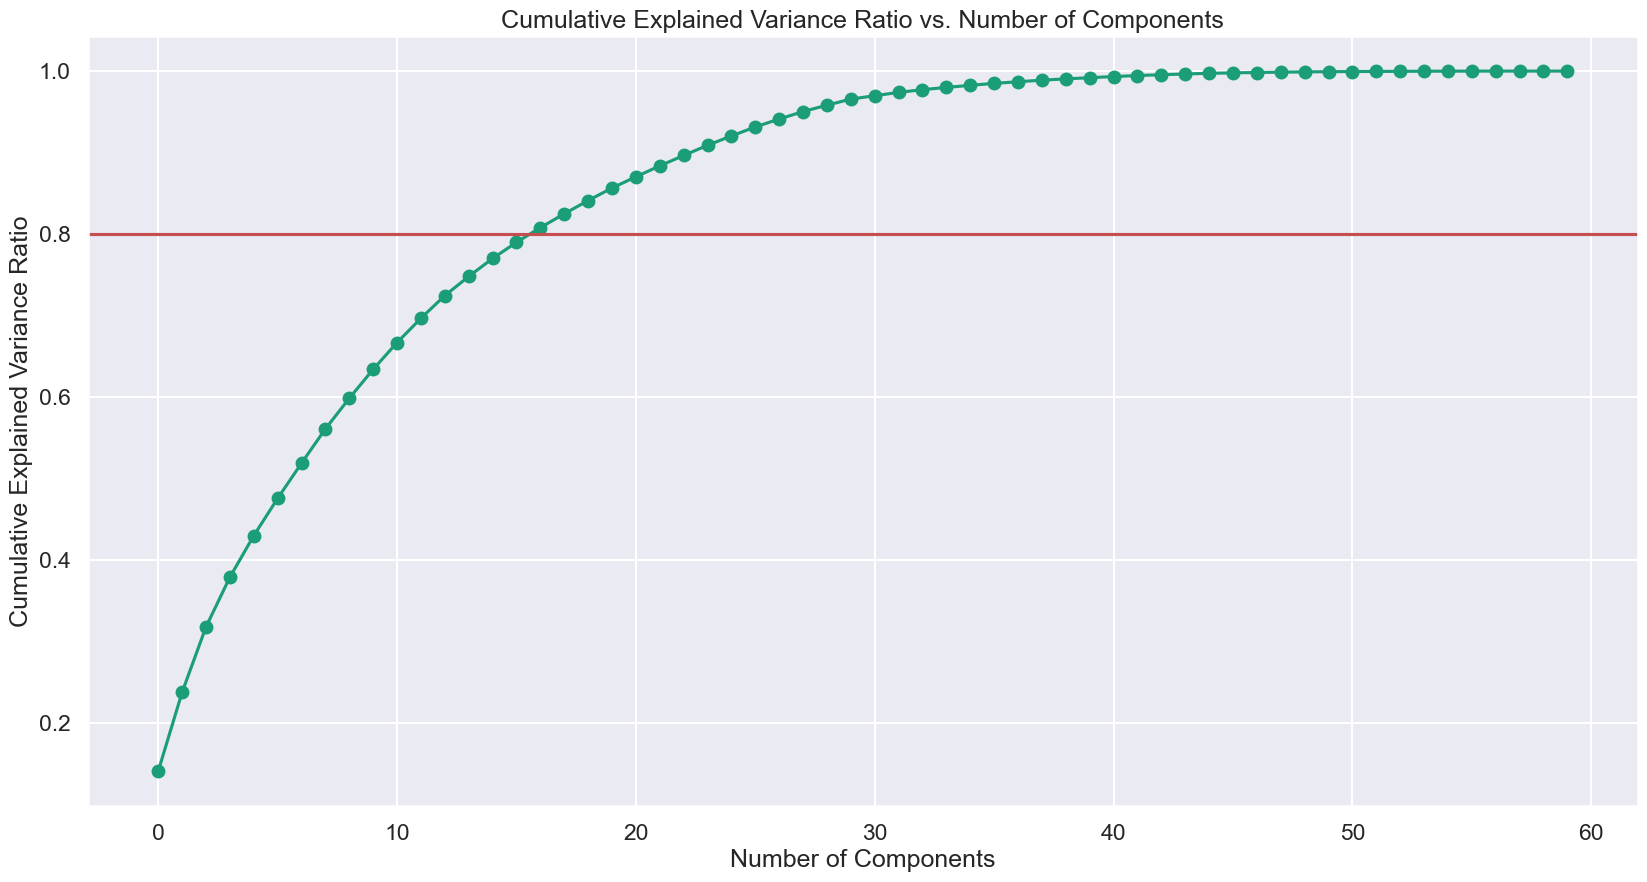


ROBUST SCALER
Number of columns: 7


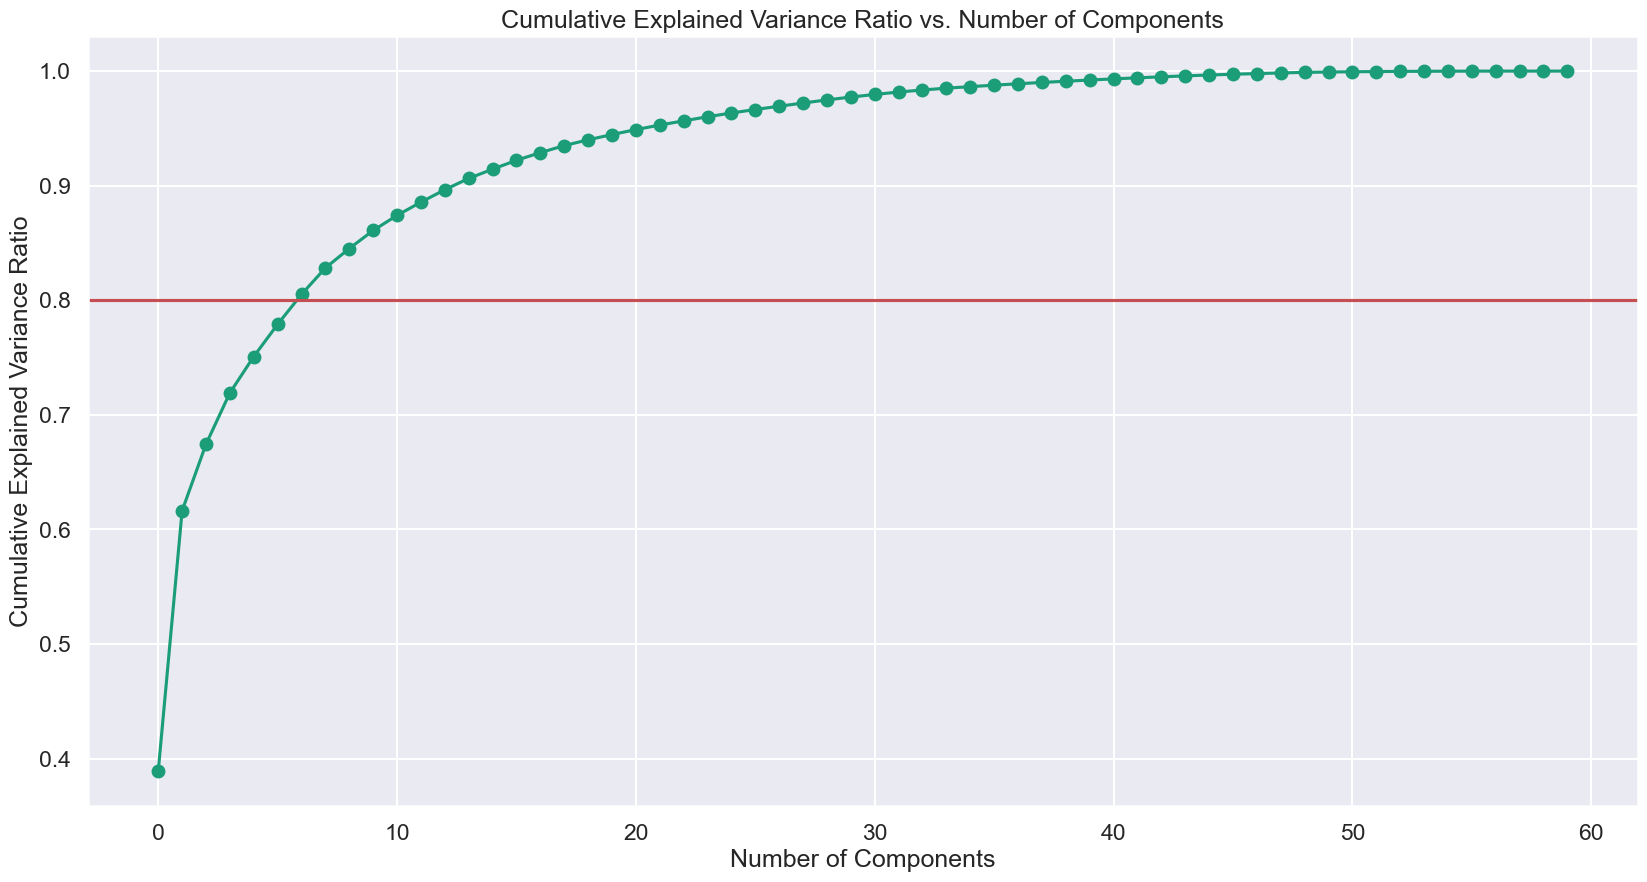


POWER TRANSFORMER
Number of columns: 23


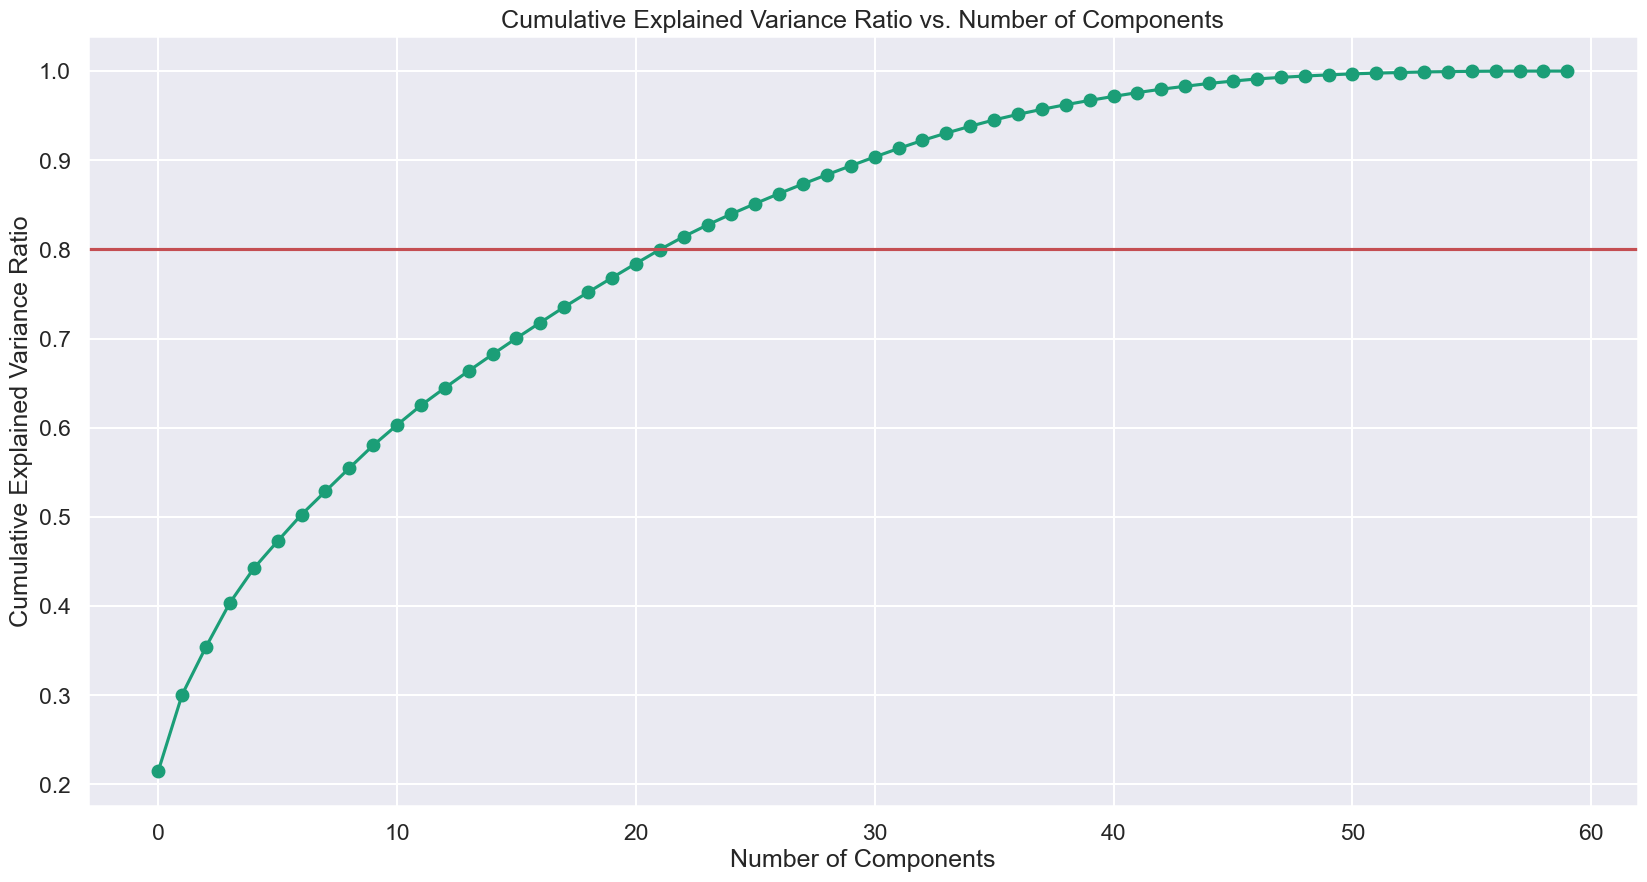

In [8]:
print('NO SCALING')
data_no = pc_analysis(data_no, show=True)

print('\nMINMAX SCALER')
data_mm = pc_analysis(data_mm, show=True)

print('\nROBUST SCALER')
data_rb = pc_analysis(data_rb, show=True)

print('\nPOWER TRANSFORMER')
data_yj = pc_analysis(data_yj, show=True)

# Clustering

In the notebook, the cluster analysis is grouped by data inputs - no scaling, principal components, standard scaler, minmax scaler, robust scaler. In each group, *n* methods of scaling were used and they are presented in this order:
1. KMeans
2. Single (Hierarchical)
3. Complete (Hierarchical)
4. Ward (Hierarchical)
5. Average (Hierarchical)
6. Meanshift [*if applied*]

In each application, it was chosen the best solution (from our perspective). In the situations that solutions of different number of clusters were compared the sacrificed ones were put as comment as well as the cluster comparision between them, in case that one would like to see the differences.

## No scaling

### KMeans

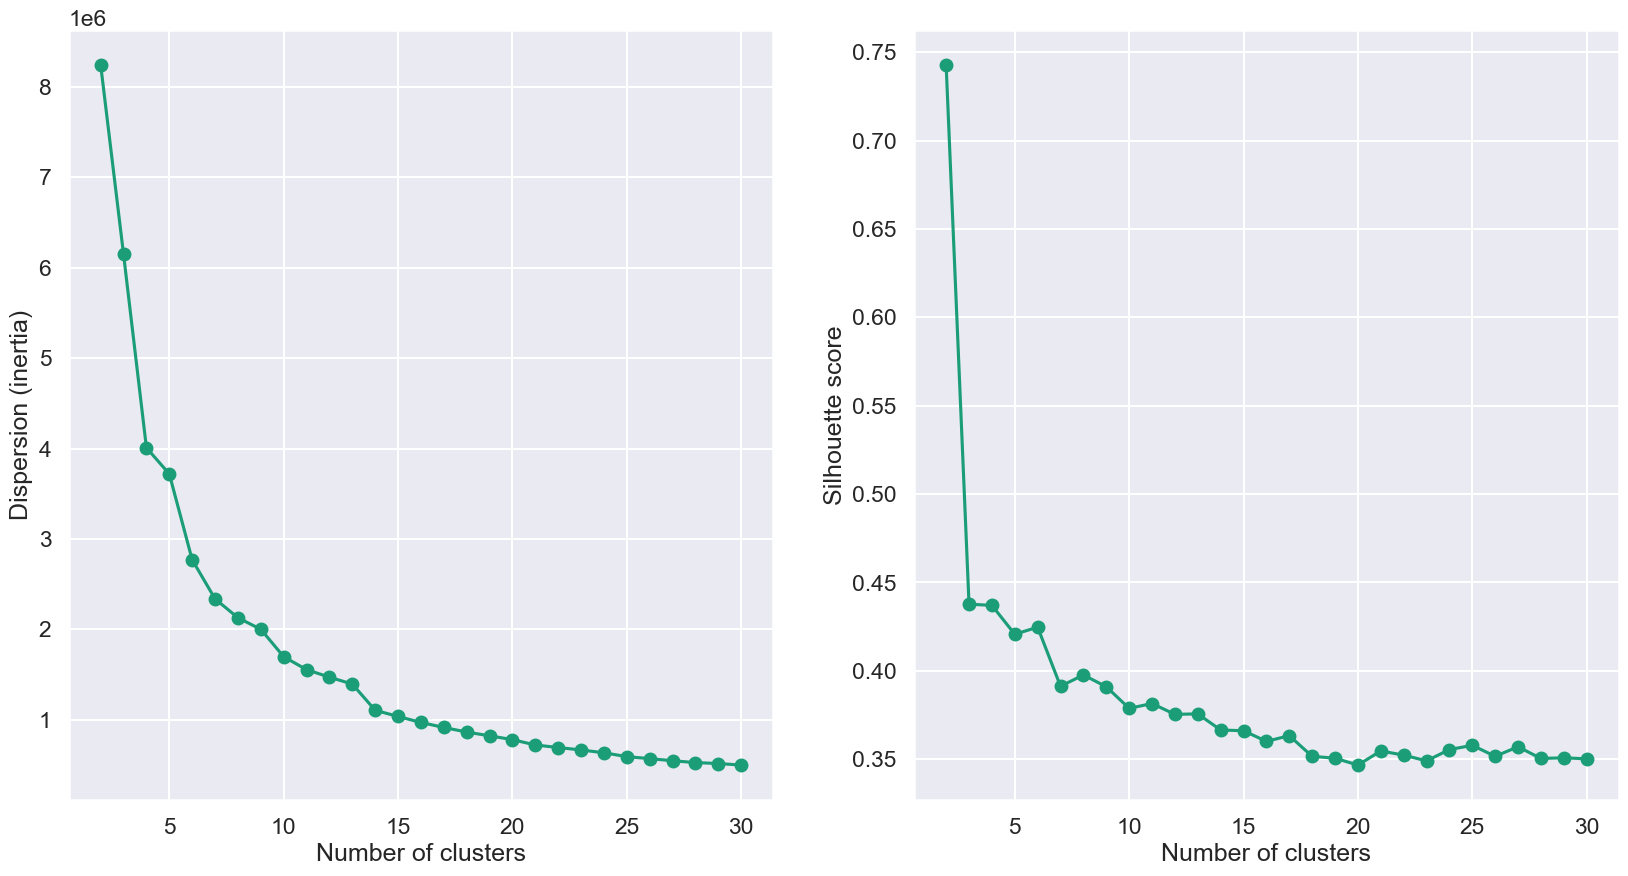

In [9]:
plot_inertia_and_silhouette(data_no)

---

### Hierarchical Clustering

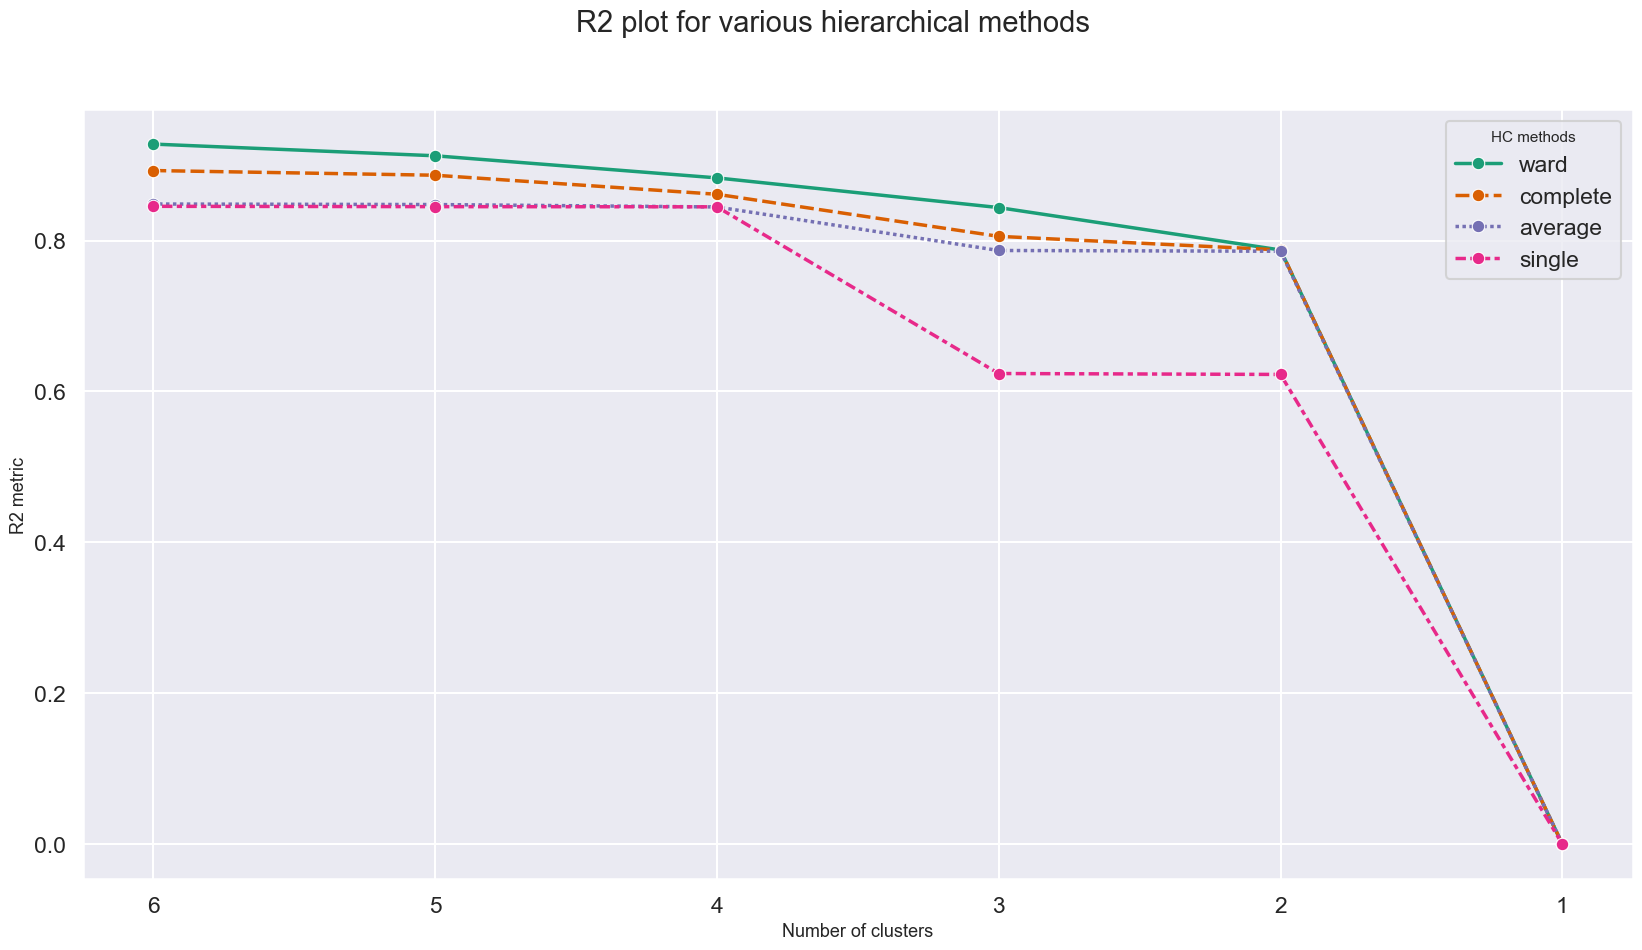

In [10]:
plot_r2_hc(data_no)

#### Single

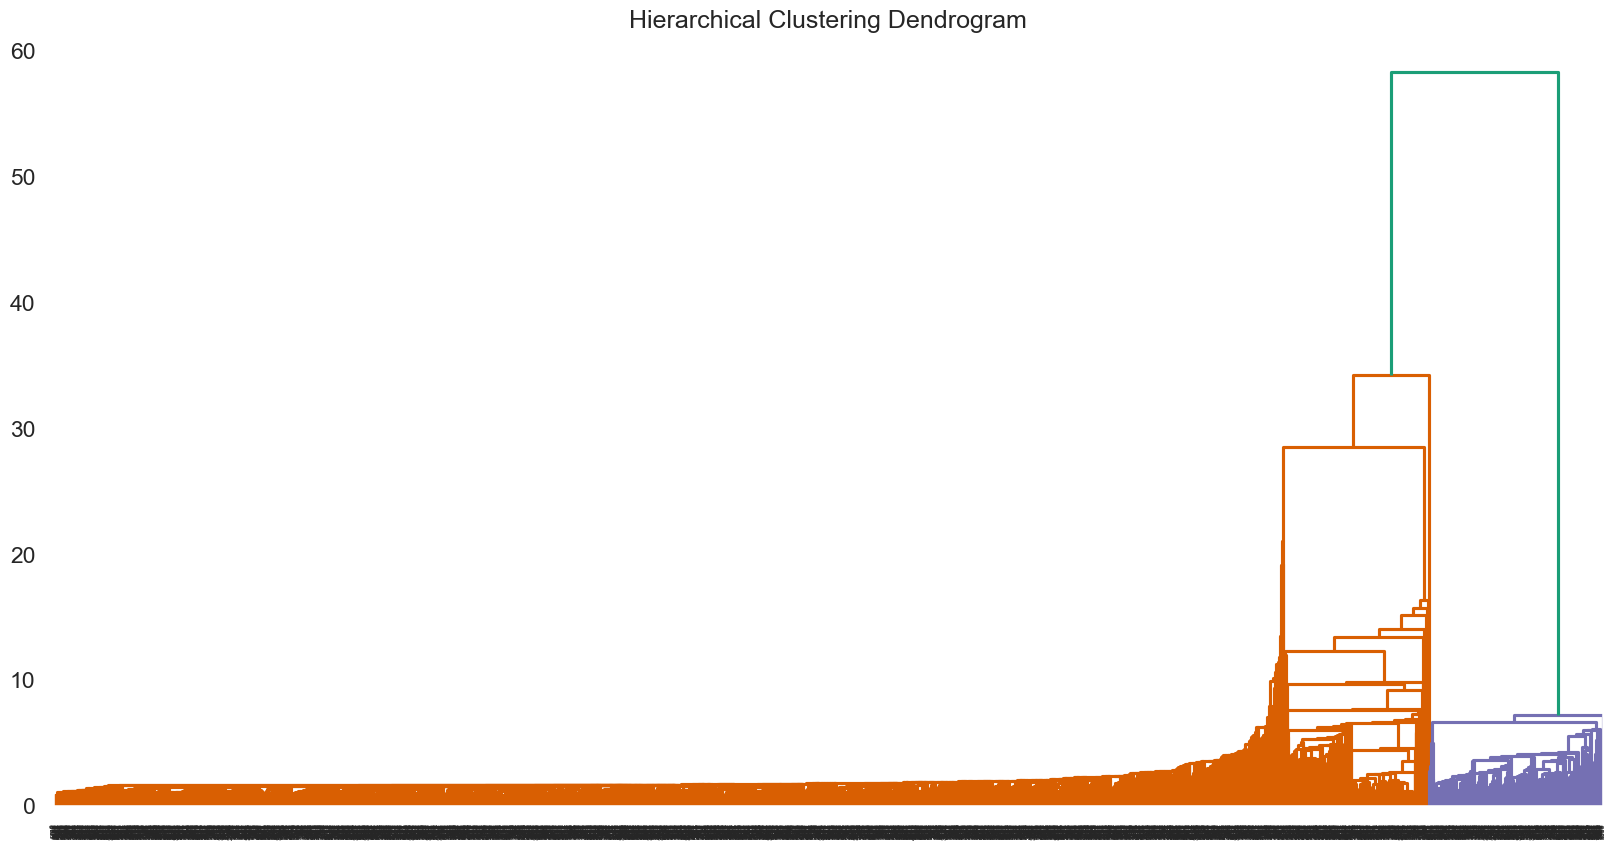

In [11]:
plot_dendrogram(data_no, 'single')

In [12]:
data['no_single2'] = AgglomerativeClustering(
    linkage='single', n_clusters=2
    ).fit_predict(data_no)

In [13]:
groupby_mean(data, 'no_single2')

no_single2,0,1
Course area_Art,0.108707,0.028226
Course area_Business sciences,0.198829,0.272177
Course area_Engineering and related techniques,0.034623,0.092742
Course area_Health,0.201629,0.120968
Course area_Information and journalism,0.076884,0.058468
Course area_Personal services,0.055754,0.066532
Course area_Social services,0.129837,0.120968
Course area_Teacher training/trainers and education sciences,0.044297,0.036290
Course area_Veterinary sciences,0.076884,0.070565
Marital status,0.897403,0.794355


---

#### Complete

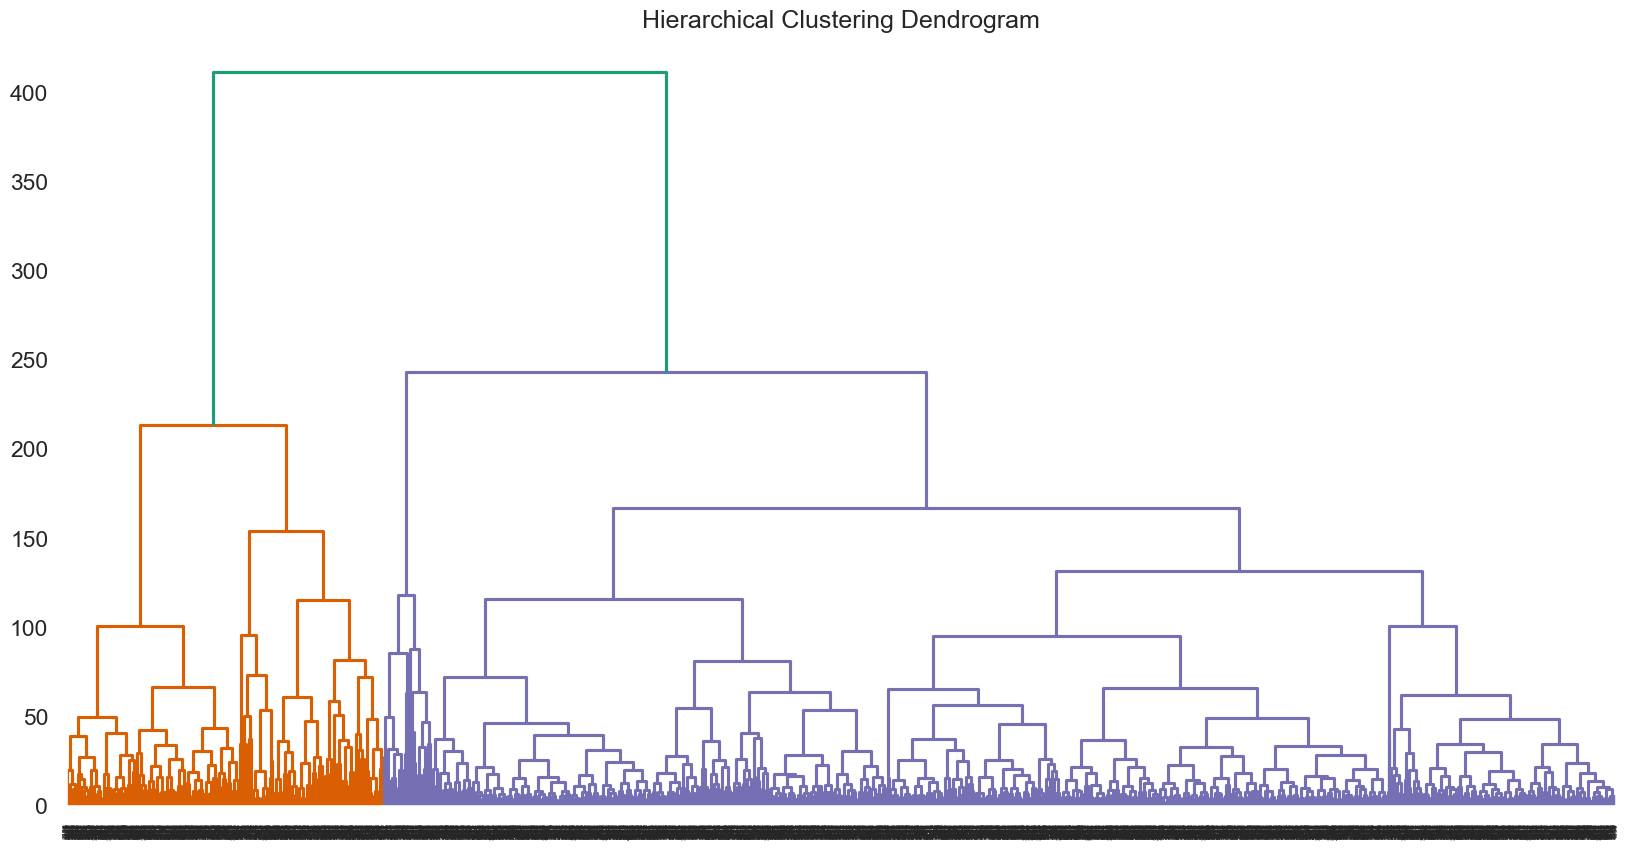

In [14]:
plot_dendrogram(data_no, 'complete')

In [15]:
data['no_complete2'] = AgglomerativeClustering(
    linkage='complete', n_clusters=2
    ).fit_predict(data_no)

data['no_complete4'] = AgglomerativeClustering(
    linkage='complete', n_clusters=4
    ).fit_predict(data_no)

In [16]:
clusters_comparison(data, 'no_single2', 'no_complete2')

,no_complete2 0 Cluster,no_complete2 1 Cluster
no_single2 0 Cluster,3516,412
no_single2 1 Cluster,0,496


In [17]:
groupby_mean(data, 'no_complete2')

no_complete2,0,1
Course area_Art,0.066837,0.226872
Course area_Business sciences,0.204494,0.216960
Course area_Engineering and related techniques,0.033276,0.071586
Course area_Health,0.217577,0.095815
Course area_Information and journalism,0.079920,0.055066
Course area_Personal services,0.058020,0.052863
Course area_Social services,0.137941,0.093612
Course area_Teacher training/trainers and education sciences,0.047213,0.028634
Course area_Veterinary sciences,0.081342,0.056167
Marital status,0.895620,0.848018


---

#### Ward

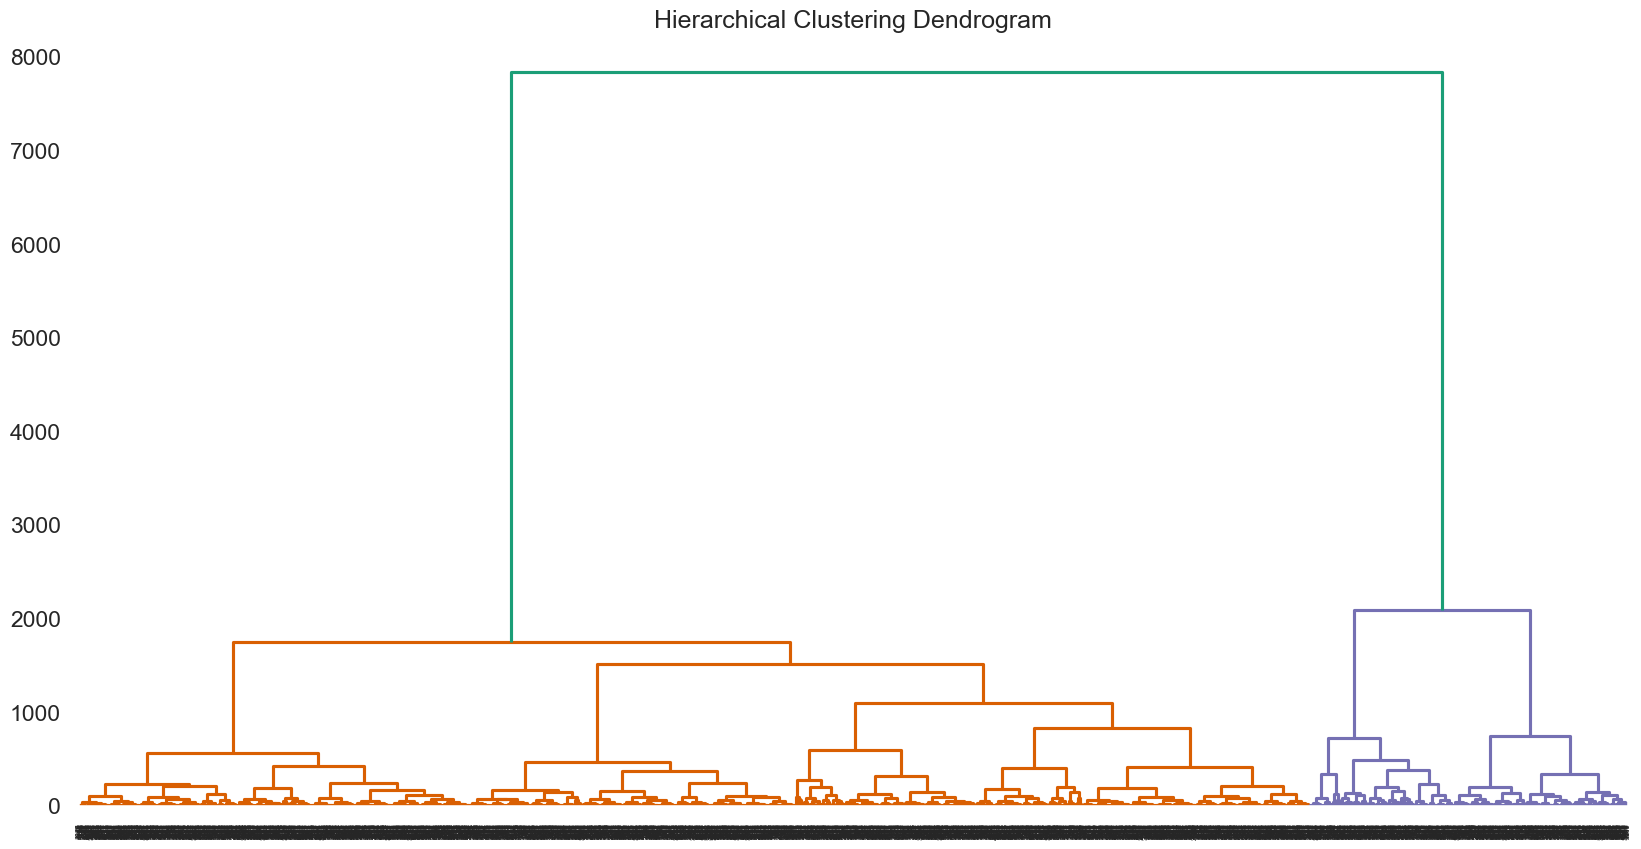

In [18]:
plot_dendrogram(data_no, 'ward')

In [19]:
data['no_ward2'] = AgglomerativeClustering(
    linkage='ward', n_clusters=2
    ).fit_predict(data_no)

In [20]:
clusters_comparison(data, 'no_single2', 'no_ward2')

,no_ward2 0 Cluster,no_ward2 1 Cluster
no_single2 0 Cluster,414,3514
no_single2 1 Cluster,496,0


In [21]:
clusters_comparison(data, 'no_complete2', 'no_ward2')

,no_ward2 0 Cluster,no_ward2 1 Cluster
no_complete2 0 Cluster,2,3514
no_complete2 1 Cluster,908,0


In [22]:
groupby_mean(data, 'no_ward2')

no_ward2,0,1
Course area_Art,0.226374,0.066875
Course area_Business sciences,0.216484,0.204610
Course area_Engineering and related techniques,0.072527,0.033011
Course area_Health,0.096703,0.217416
Course area_Information and journalism,0.054945,0.079966
Course area_Personal services,0.052747,0.058054
Course area_Social services,0.093407,0.138019
Course area_Teacher training/trainers and education sciences,0.028571,0.047240
Course area_Veterinary sciences,0.056044,0.081389
Marital status,0.847253,0.895845


---

#### Average

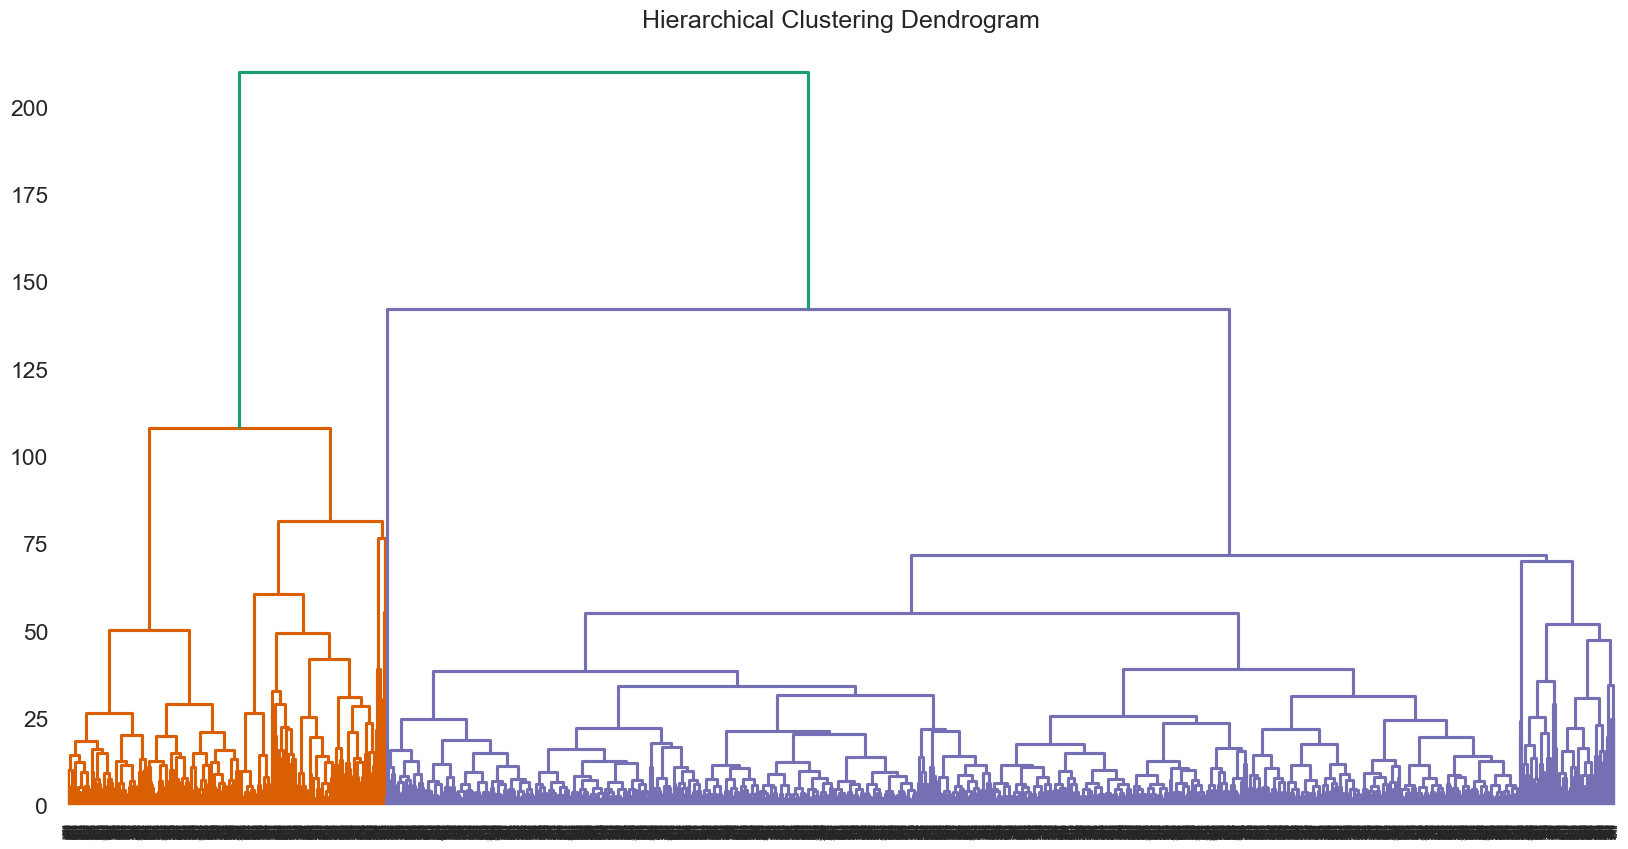

In [24]:
plot_dendrogram(data_no, 'average')

In [25]:
data['no_average2'] = AgglomerativeClustering(
    linkage='average', n_clusters=2
    ).fit_predict(data_no)

In [26]:
clusters_comparison(data, 'no_ward2', 'no_average2')

,no_average2 0 Cluster,no_average2 1 Cluster
no_ward2 0 Cluster,0,910
no_ward2 1 Cluster,3509,5


### MeanShift

In [27]:
no_meanshift = MeanShift(bandwidth=40, bin_seeding=True, n_jobs=-1).fit(data_no)
data['no_meanshift'] = no_meanshift.labels_
data['no_meanshift'].value_counts()

no_meanshift
0    3515
1     496
2     413
Name: count, dtype: int64

In [28]:
clusters_comparison(data, 'no_ward2', 'no_meanshift')

,no_meanshift 0 Cluster,no_meanshift 1 Cluster,no_meanshift 2 Cluster
no_ward2 0 Cluster,2,496,412
no_ward2 1 Cluster,3513,0,1


In [29]:
clusters_comparison(data, 'no_single2', 'no_meanshift')

,no_meanshift 0 Cluster,no_meanshift 1 Cluster,no_meanshift 2 Cluster
no_single2 0 Cluster,3515,0,413
no_single2 1 Cluster,0,496,0


In [30]:
groupby_mean(data, 'no_meanshift')

no_meanshift,0,1,2
Course area_Art,0.066856,0.028226,0.464891
Course area_Business sciences,0.204552,0.272177,0.150121
Course area_Engineering and related techniques,0.033001,0.092742,0.048426
Course area_Health,0.217639,0.120968,0.065375
Course area_Information and journalism,0.079943,0.058468,0.050847
Course area_Personal services,0.058037,0.066532,0.036320
Course area_Social services,0.137980,0.120968,0.060533
Course area_Teacher training/trainers and education sciences,0.047226,0.036290,0.019370
Course area_Veterinary sciences,0.081366,0.070565,0.038741
Marital status,0.895875,0.794355,0.910412


### UMAP

c:\Users\Afonso Cadete\anaconda3\envs\ml\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
g:\O meu disco\Universidade\3rd year\2nd semester\Machine Learning\II\Project\utils2.py:387: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  handles = [plt.scatter([], [], c=cmap(norm(i)), label=label) for i, label in enumerate(labels)]


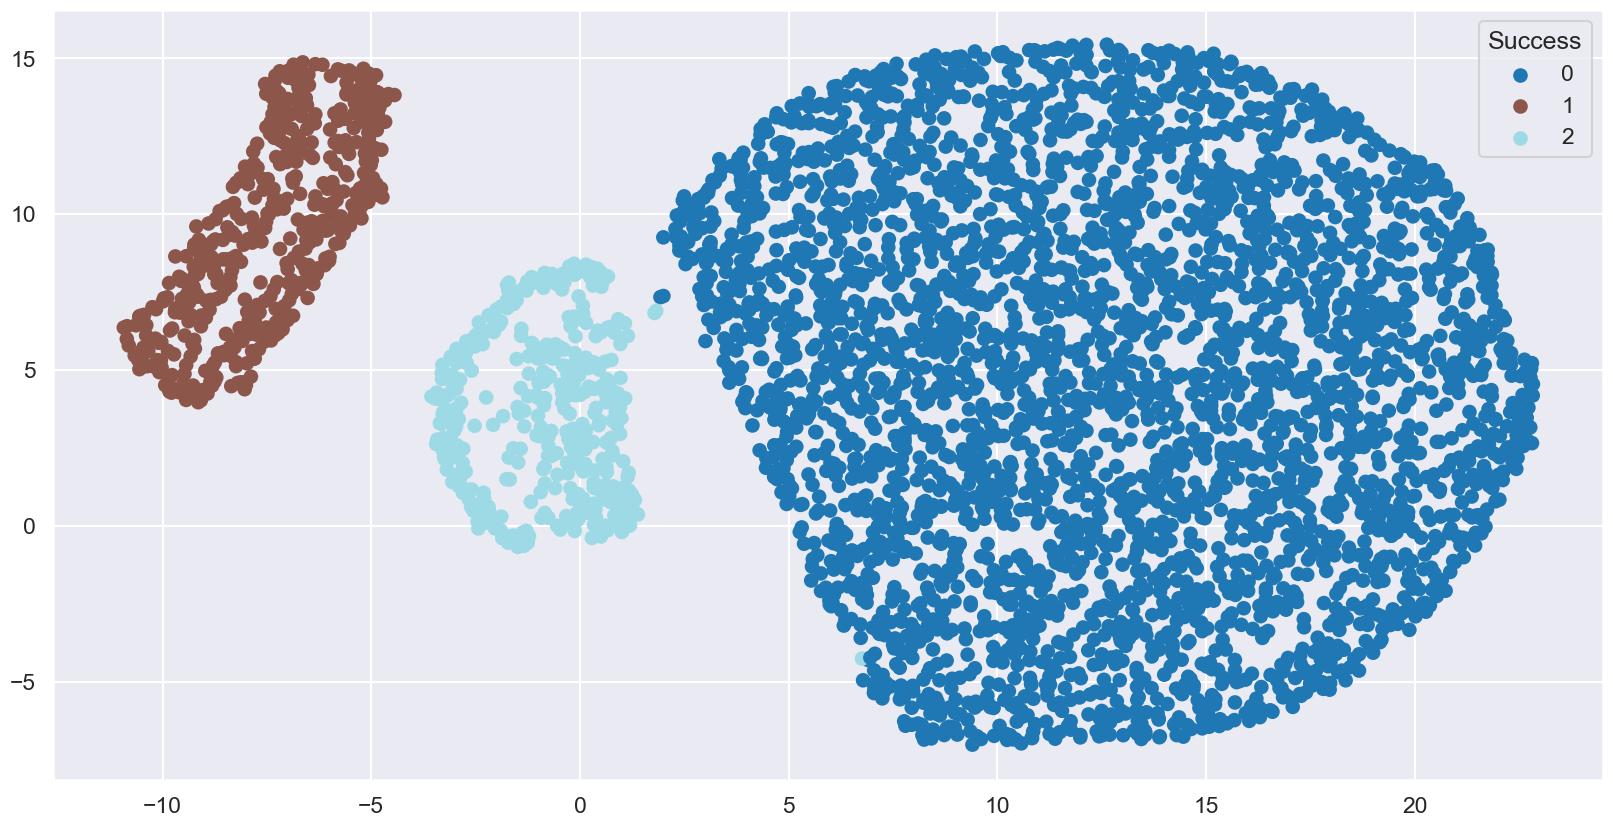

In [31]:
umap_object = umap.UMAP(n_neighbors=160, min_dist=1, random_state=16, n_jobs=-1)
umap_embedding = umap_object.fit_transform(data_no)
visualize_dimensionality_reduction(umap_embedding, data['no_meanshift'])

---
---

## MinMax

### KMeans

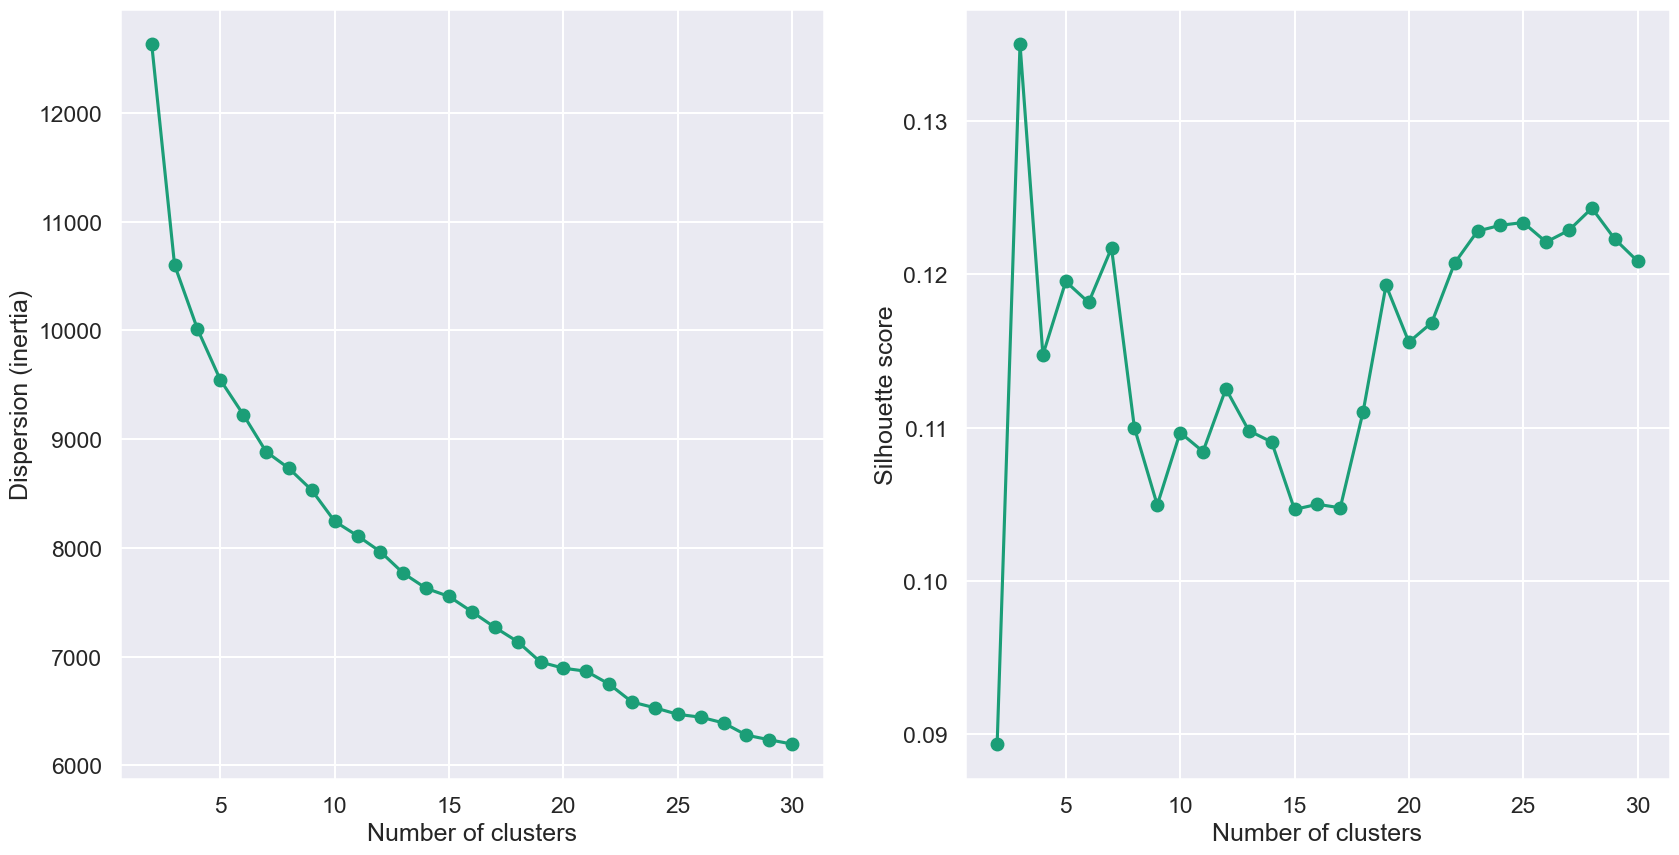

In [32]:
plot_inertia_and_silhouette(data_mm)

### Hierarchical

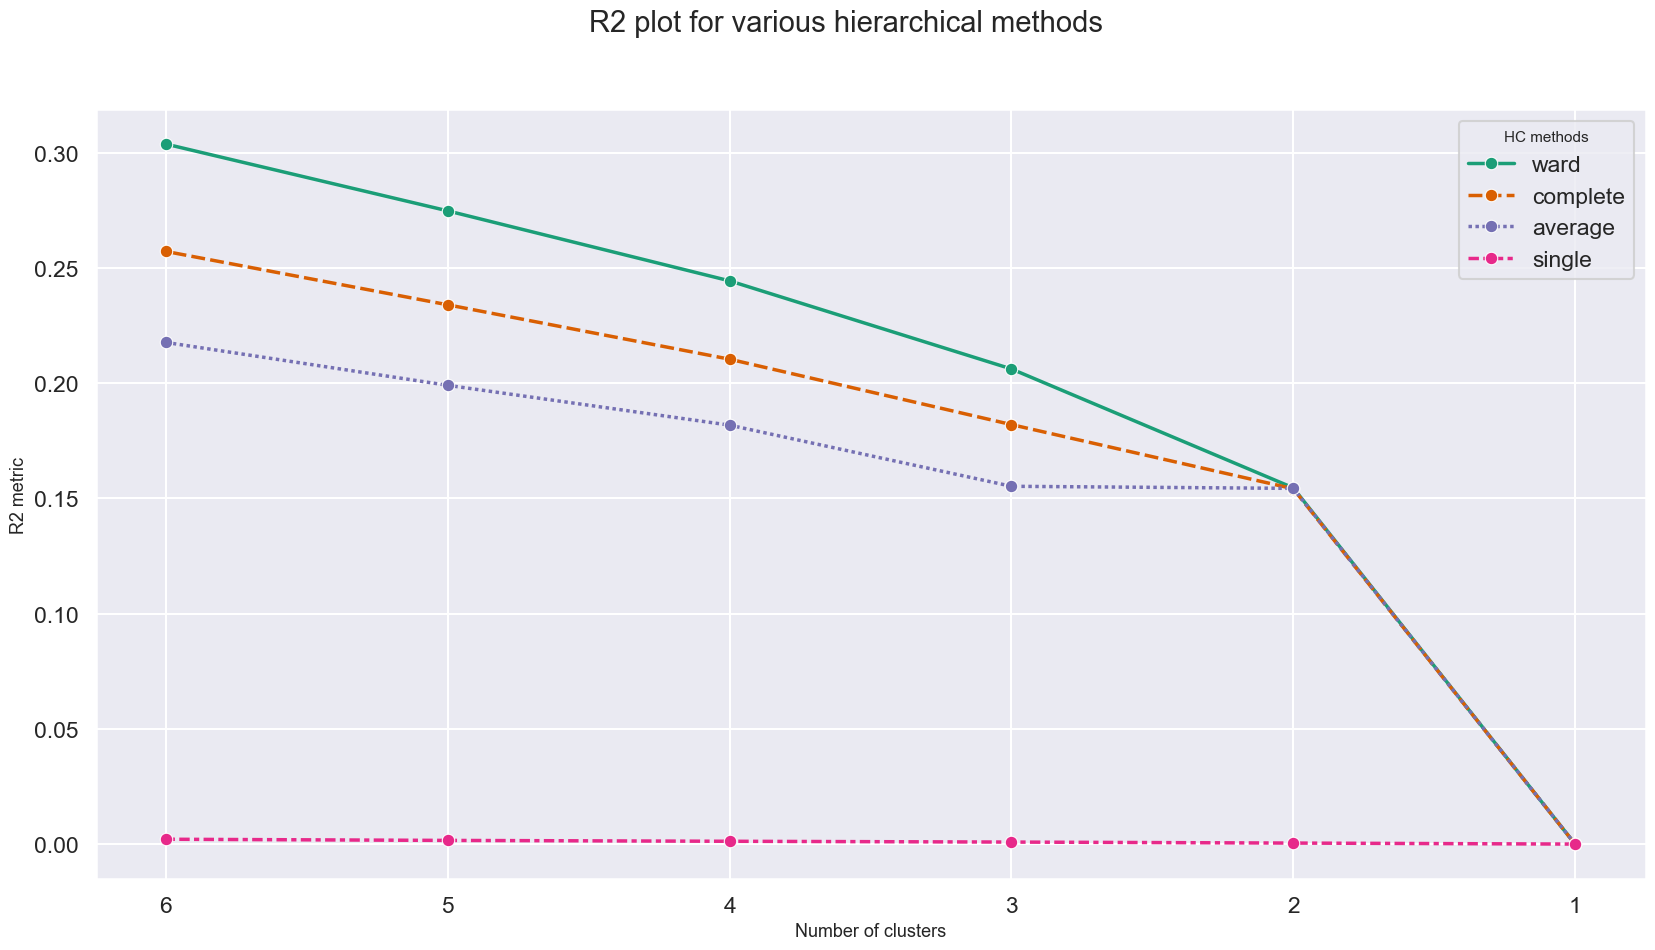

In [33]:
plot_r2_hc(data_mm)

## Robust

### KMeans

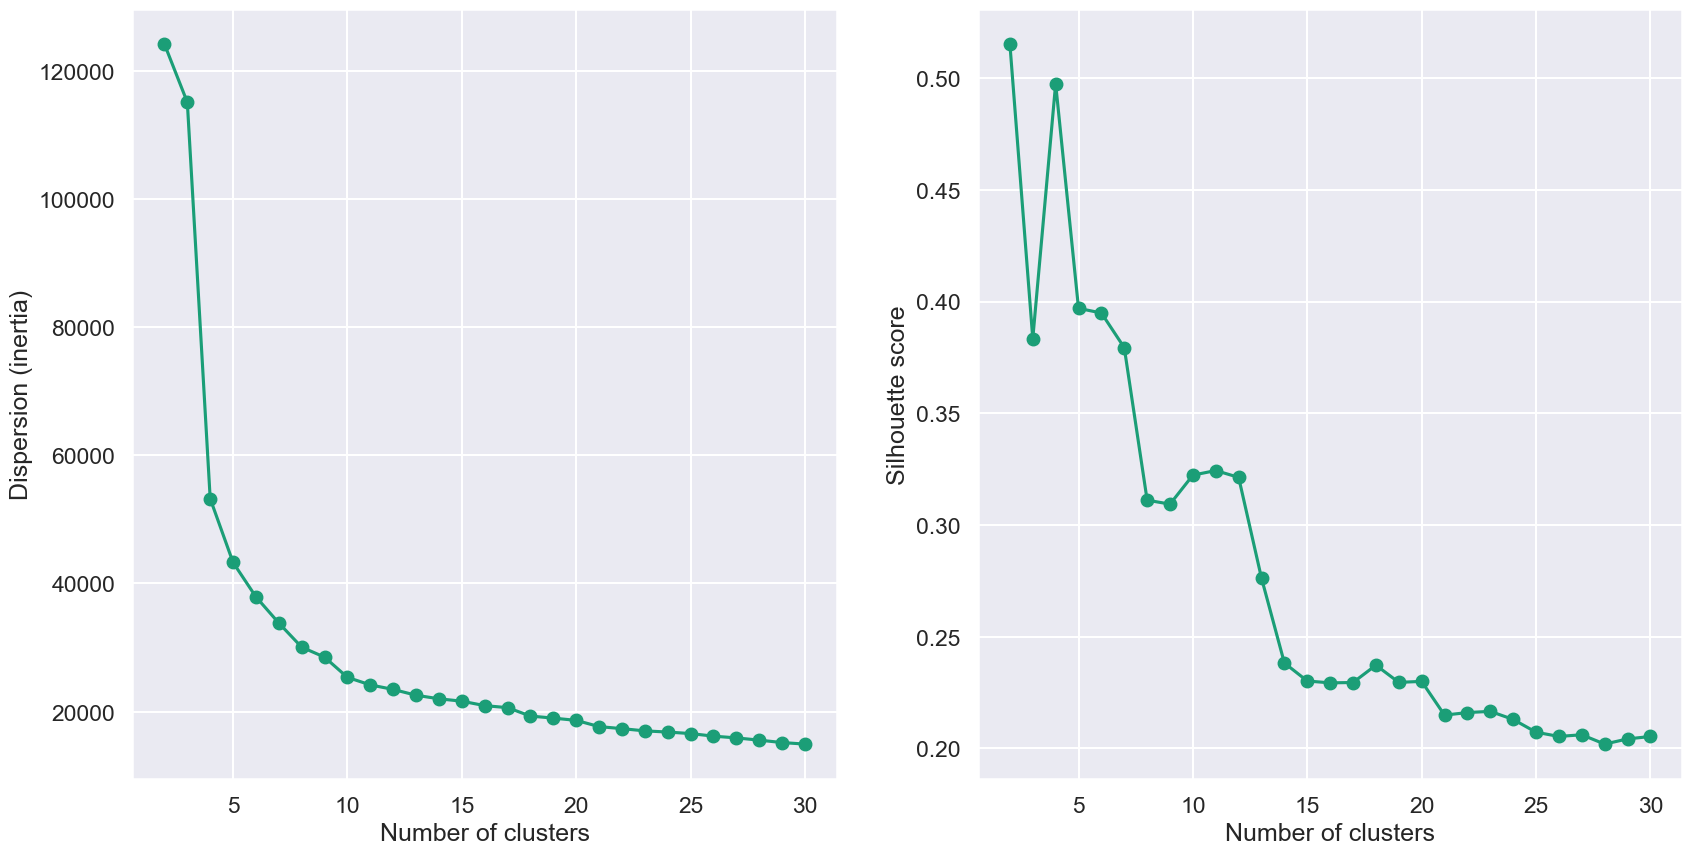

In [34]:
plot_inertia_and_silhouette(data_rb)

---

### Hierarchical Clustering

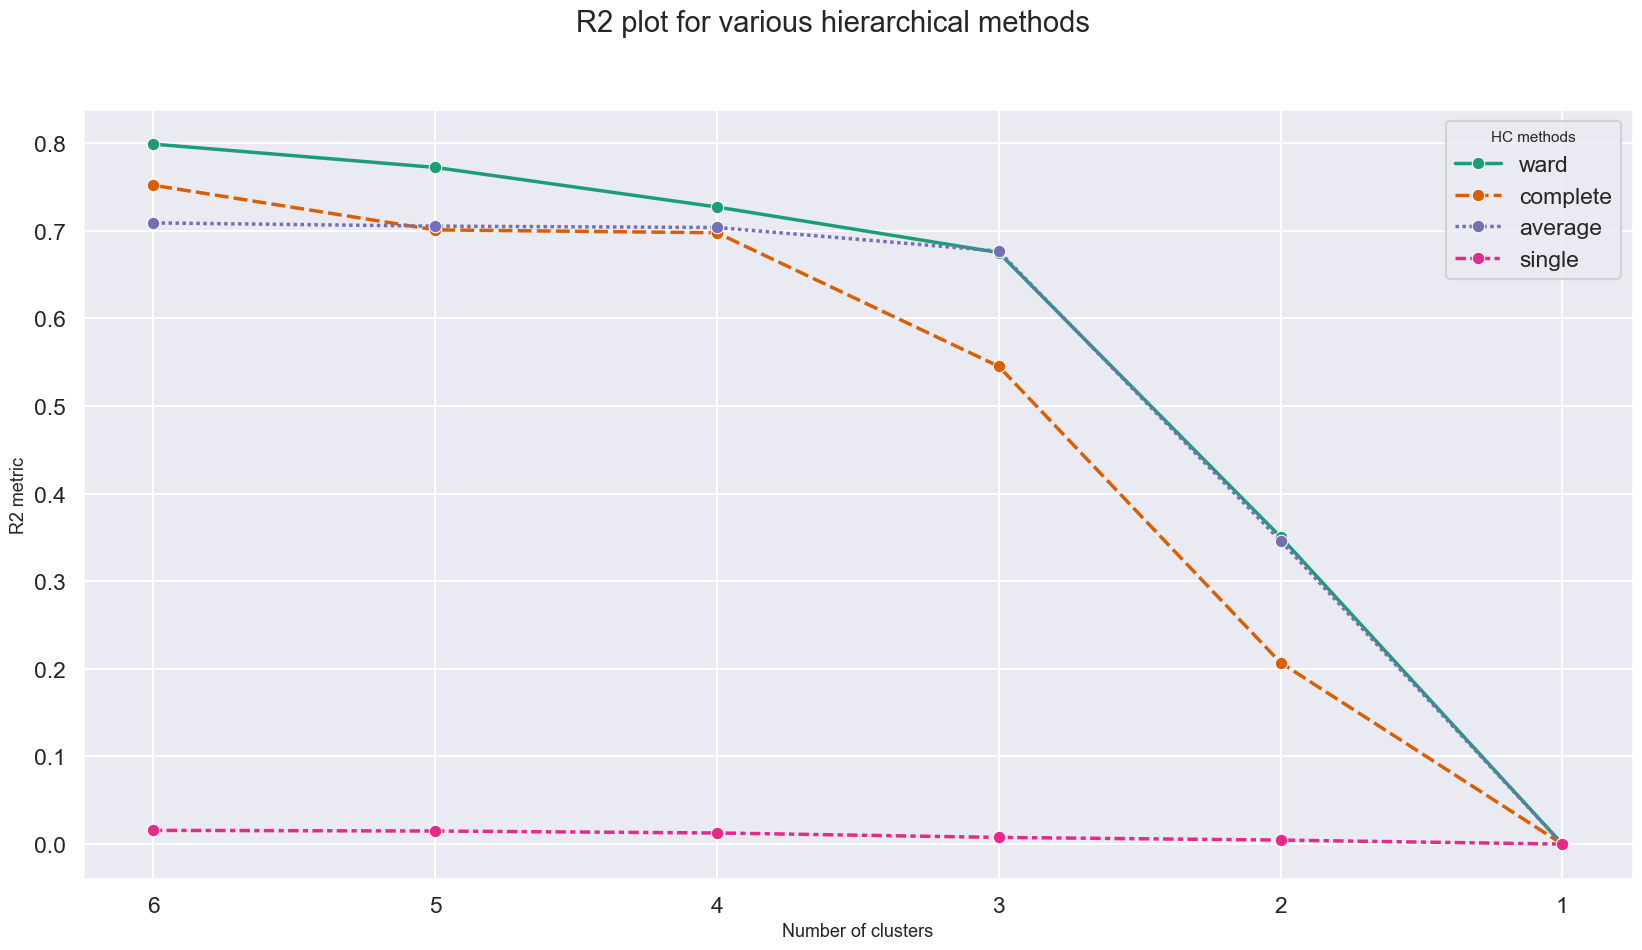

In [35]:
plot_r2_hc(data_rb)

#### Single

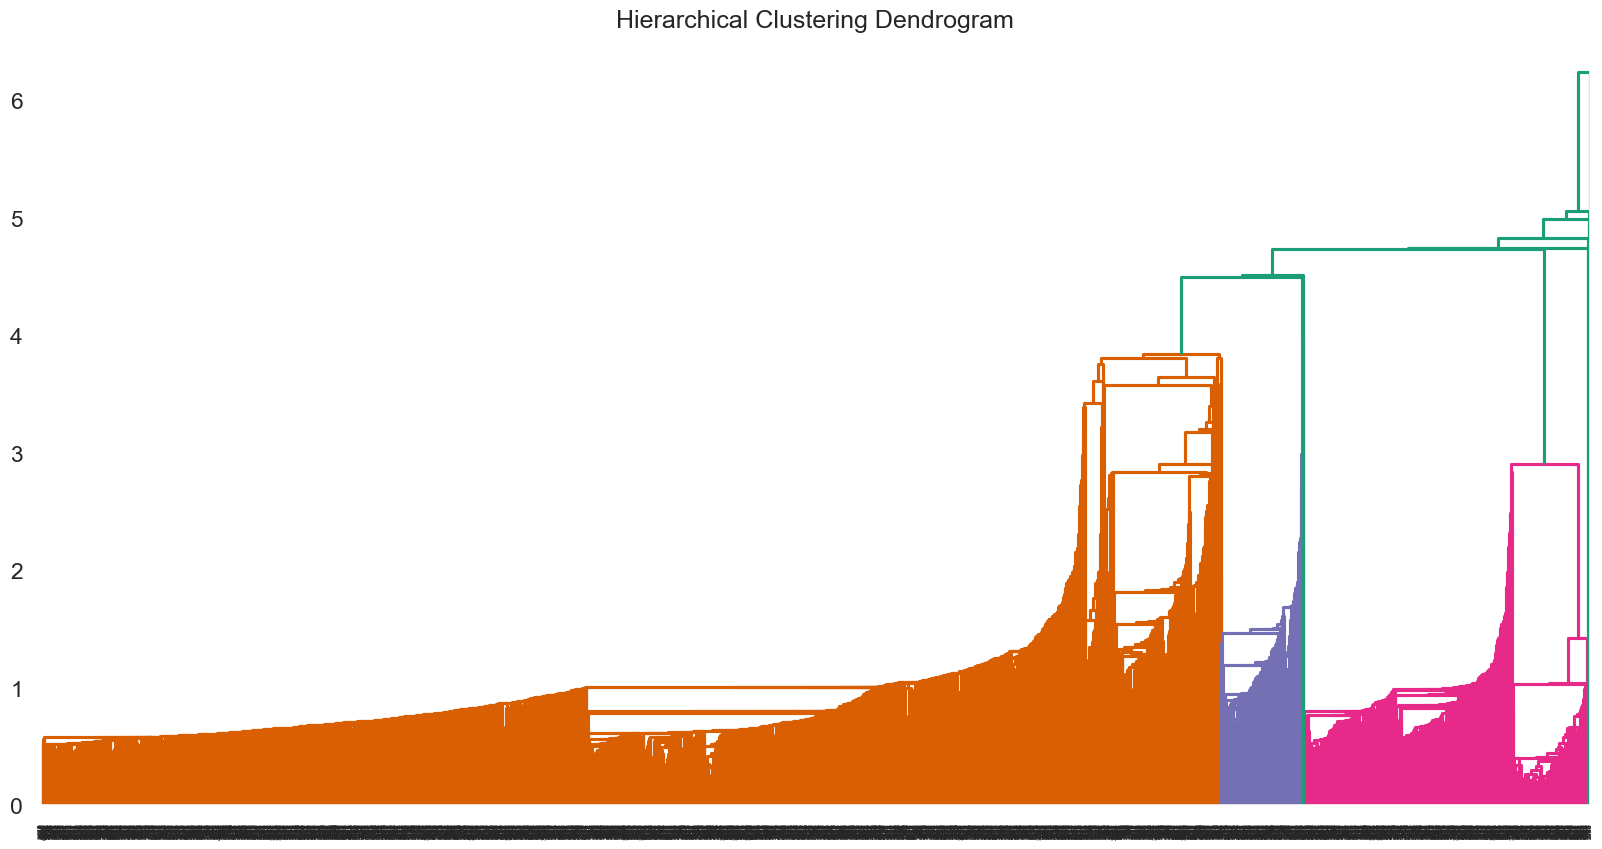

In [36]:
plot_dendrogram(data_rb, 'single')

---

#### Complete

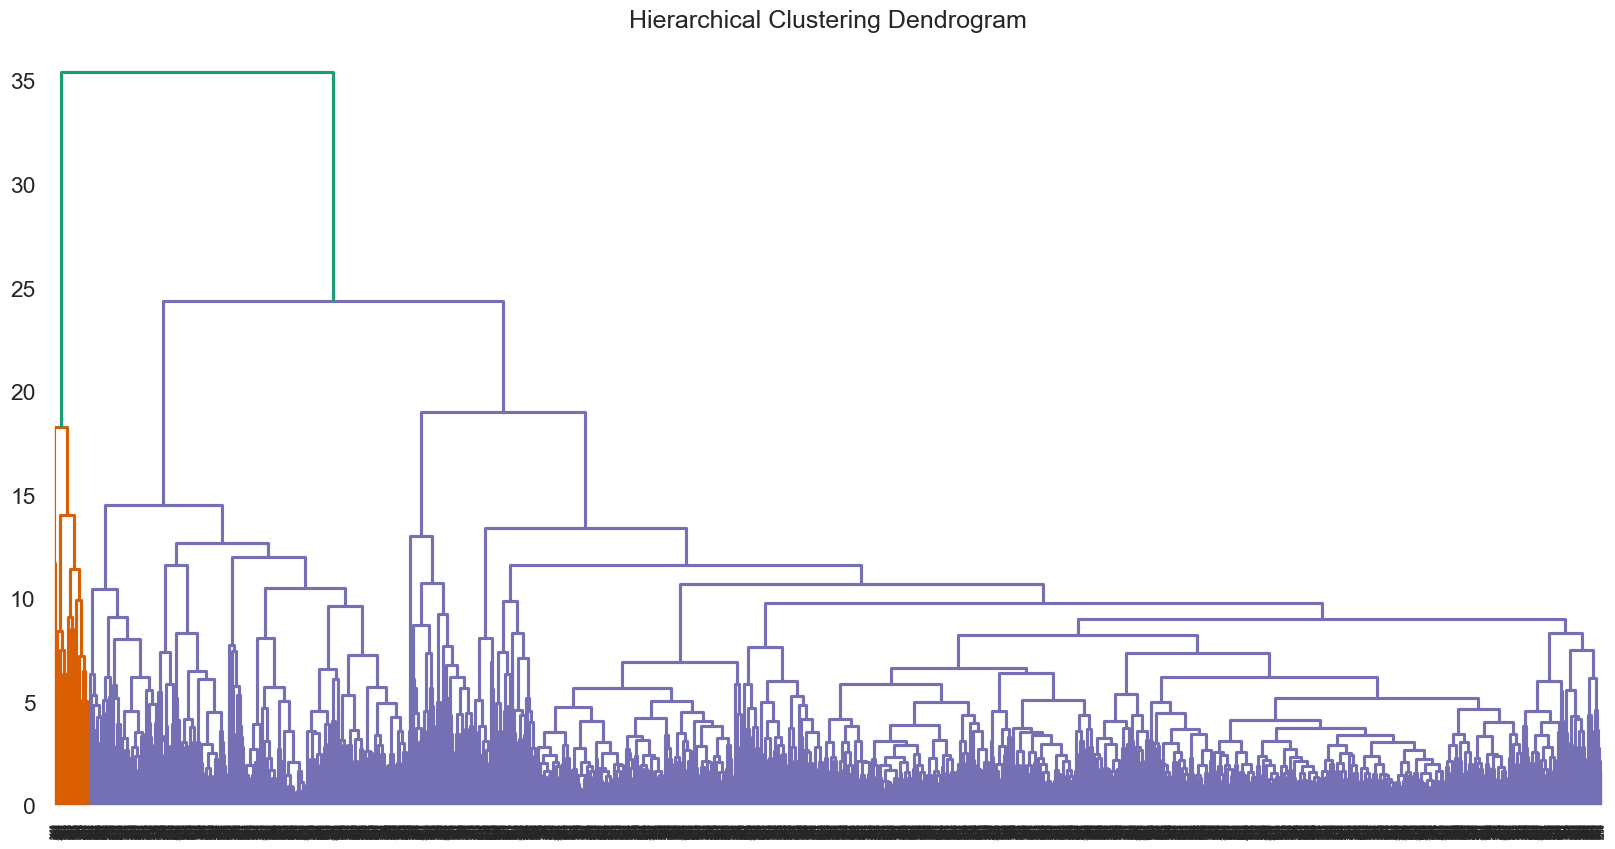

In [37]:
plot_dendrogram(data_rb, 'complete')

In [38]:
data['rb_complete2'] = AgglomerativeClustering(
    linkage='complete', n_clusters=2
    ).fit_predict(data_rb)

data['rb_complete3'] = AgglomerativeClustering(
    linkage='complete', n_clusters=3
    ).fit_predict(data_rb)

In [39]:
clusters_comparison(data, 'no_complete2', 'rb_complete2')

,rb_complete2 0 Cluster,rb_complete2 1 Cluster
no_complete2 0 Cluster,3411,105
no_complete2 1 Cluster,908,0


In [40]:
clusters_comparison(data, 'no_meanshift', 'rb_complete3')

,rb_complete3 0 Cluster,rb_complete3 1 Cluster,rb_complete3 2 Cluster
no_meanshift 0 Cluster,3407,105,3
no_meanshift 1 Cluster,0,0,496
no_meanshift 2 Cluster,0,0,413


In [41]:
groupby_mean(data, 'rb_complete2')

rb_complete2,0,1
Course area_Art,0.098865,0.133333
Course area_Business sciences,0.205372,0.276190
Course area_Engineering and related techniques,0.041445,0.028571
Course area_Health,0.195184,0.085714
Course area_Information and journalism,0.076638,0.000000
Course area_Personal services,0.057652,0.028571
Course area_Social services,0.128039,0.161905
Course area_Teacher training/trainers and education sciences,0.042834,0.066667
Course area_Veterinary sciences,0.077564,0.019048
Marital status,0.889558,0.733333


---

#### Ward

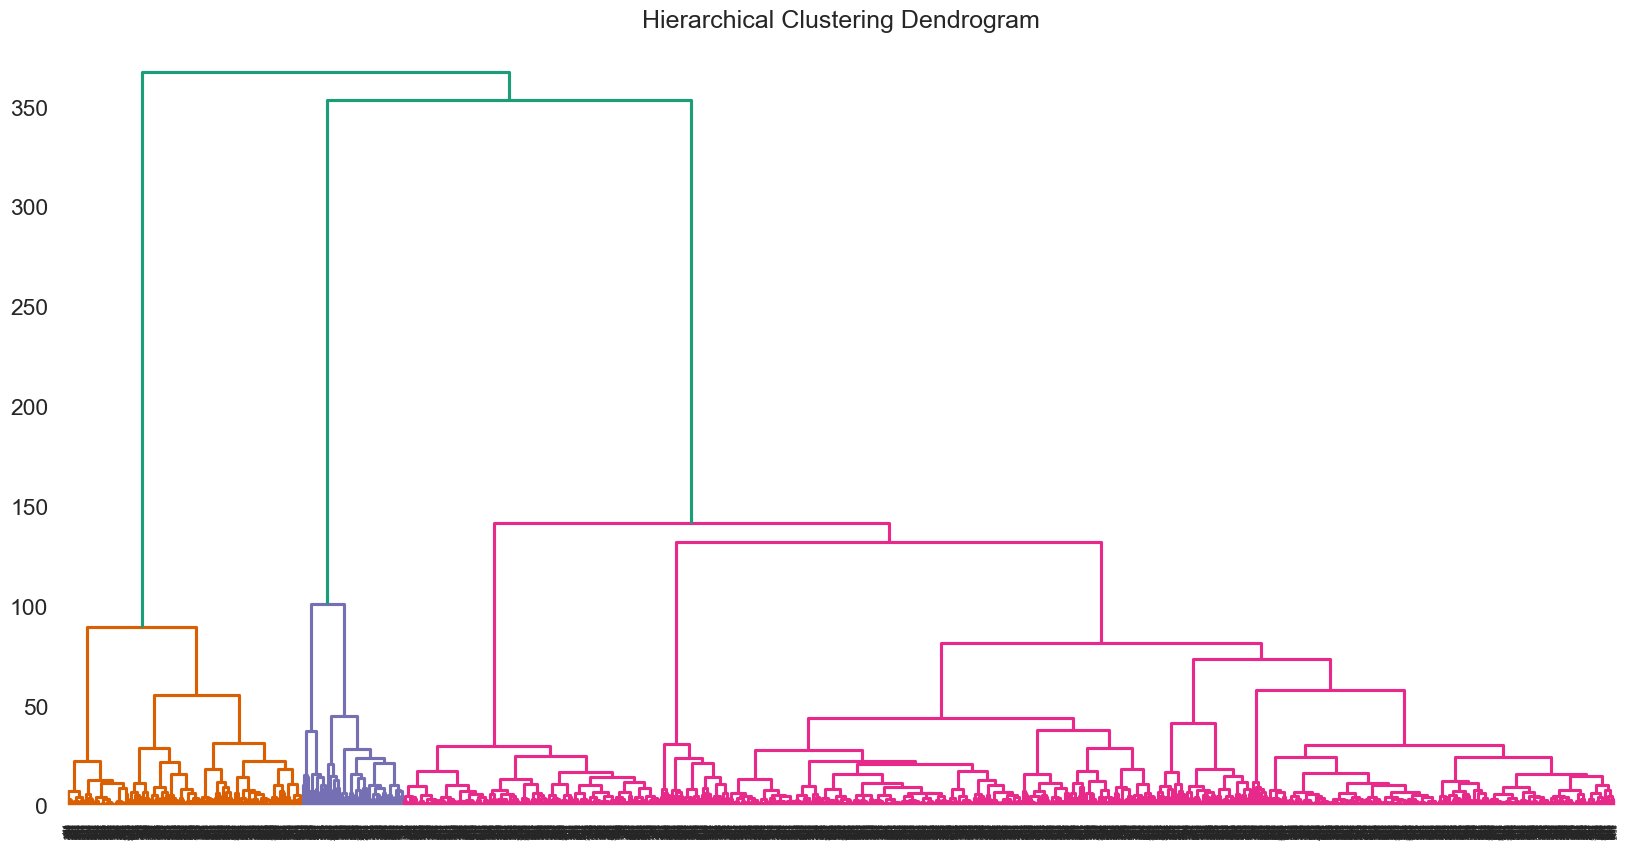

In [37]:
plot_dendrogram(data_rb, 'ward')

In [38]:
data['rb_ward3'] = AgglomerativeClustering(
    linkage='ward', n_clusters=3
    ).fit_predict(data_rb)

data['rb_ward7'] = AgglomerativeClustering(
    linkage='ward', n_clusters=7
    ).fit_predict(data_rb)

In [76]:
clusters_comparison(data, 'no_meanshift', 'rb_ward3')

,rb_ward3 0 Cluster,rb_ward3 1 Cluster,rb_ward3 2 Cluster
no_meanshift 0 Cluster,3226,0,289
no_meanshift 1 Cluster,0,496,0
no_meanshift 2 Cluster,233,180,0


In [77]:
clusters_comparison(data, 'rb_complete3', 'rb_ward3')

,rb_ward3 0 Cluster,rb_ward3 1 Cluster,rb_ward3 2 Cluster
rb_complete3 0 Cluster,3223,0,184
rb_complete3 1 Cluster,0,0,105
rb_complete3 2 Cluster,236,676,0


---

#### Average

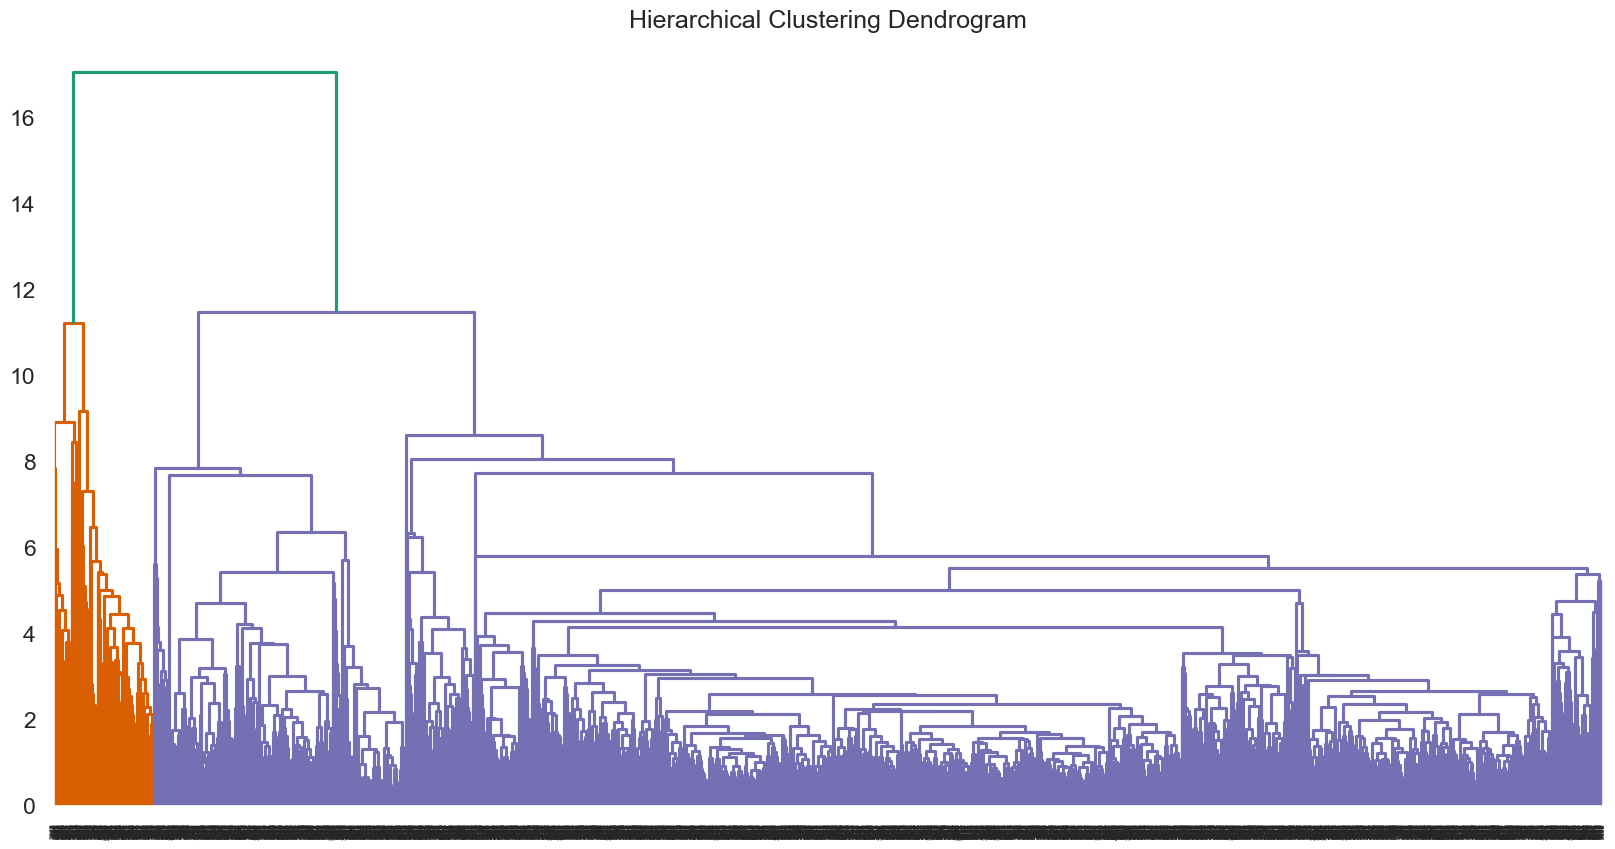

In [41]:
plot_dendrogram(data_rb, 'average')

In [42]:
data['rb_average2'] = AgglomerativeClustering(
    linkage='average', n_clusters=2
    ).fit_predict(data_rb)

In [44]:
clusters_comparison(data, 'no_ward2', 'rb_average2')

,rb_average2 0 Cluster,rb_average2 1 Cluster
no_ward2 0 Cluster,910,0
no_ward2 1 Cluster,3225,289


### MeanShift

In [43]:
rb_meanshift = MeanShift(bandwidth=7, bin_seeding=True, n_jobs=-1).fit(data_rb)
data['rb_meanshift'] = rb_meanshift.labels_
data['rb_meanshift'].value_counts()

rb_meanshift
0    3410
1     727
2     287
Name: count, dtype: int64

In [44]:
clusters_comparison(data, 'no_meanshift', 'rb_meanshift')

,rb_meanshift 0 Cluster,rb_meanshift 1 Cluster,rb_meanshift 2 Cluster
no_meanshift 0 Cluster,3228,0,287
no_meanshift 1 Cluster,0,496,0
no_meanshift 2 Cluster,182,231,0


In [49]:
clusters_comparison(data, 'rb_ward3', 'rb_meanshift')

,rb_meanshift 0 Cluster,rb_meanshift 1 Cluster,rb_meanshift 2 Cluster
rb_ward3 0 Cluster,3408,51,0
rb_ward3 1 Cluster,0,676,0
rb_ward3 2 Cluster,2,0,287


In [52]:
groupby_mean(data, 'rb_meanshift')

rb_meanshift,0,1,2
Course area_Art,0.055132,0.272352,0.191638
Course area_Business sciences,0.203812,0.210454,0.236934
Course area_Engineering and related techniques,0.036070,0.072902,0.020906
Course area_Health,0.227273,0.085282,0.052265
Course area_Information and journalism,0.085924,0.048143,0.010453
Course area_Personal services,0.062170,0.046768,0.020906
Course area_Social services,0.131965,0.088033,0.195122
Course area_Teacher training/trainers and education sciences,0.048094,0.024759,0.034843
Course area_Veterinary sciences,0.081232,0.053645,0.073171
Marital status,0.902053,0.845942,0.794425


### UMAP

c:\Users\Afonso Cadete\anaconda3\envs\ml\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
g:\O meu disco\Universidade\3rd year\2nd semester\Machine Learning\II\Project\utils2.py:387: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  handles = [plt.scatter([], [], c=cmap(norm(i)), label=label) for i, label in enumerate(labels)]


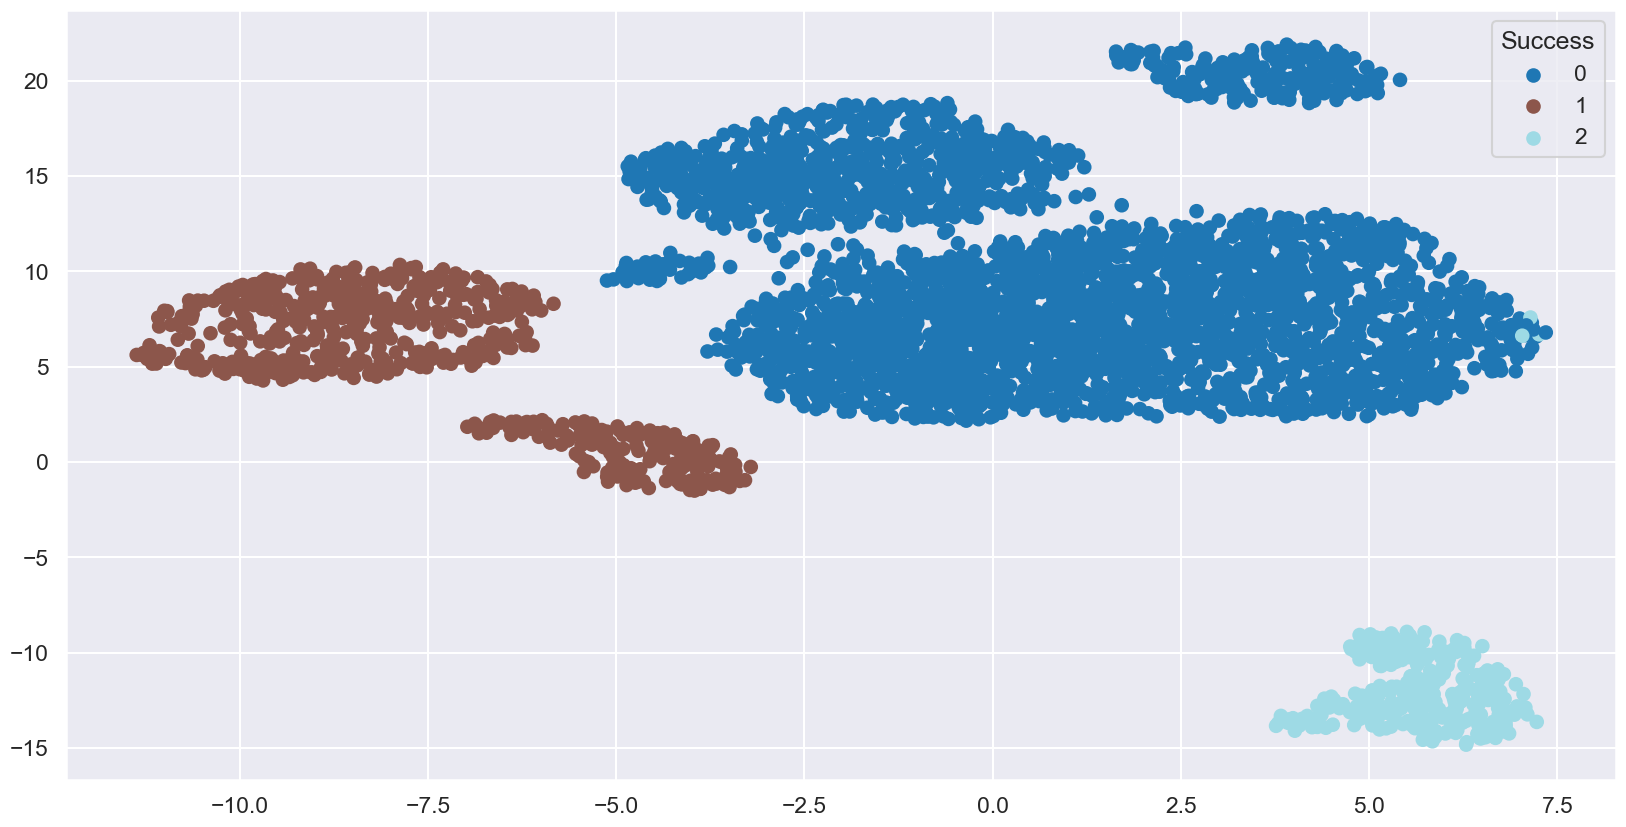

In [55]:
umap_object = umap.UMAP(n_neighbors=160, min_dist=1, random_state=16, n_jobs=-1)
umap_embedding = umap_object.fit_transform(data_rb)
visualize_dimensionality_reduction(umap_embedding, data['rb_ward3'])

---
---

## Yeo-Johnson

### KMeans

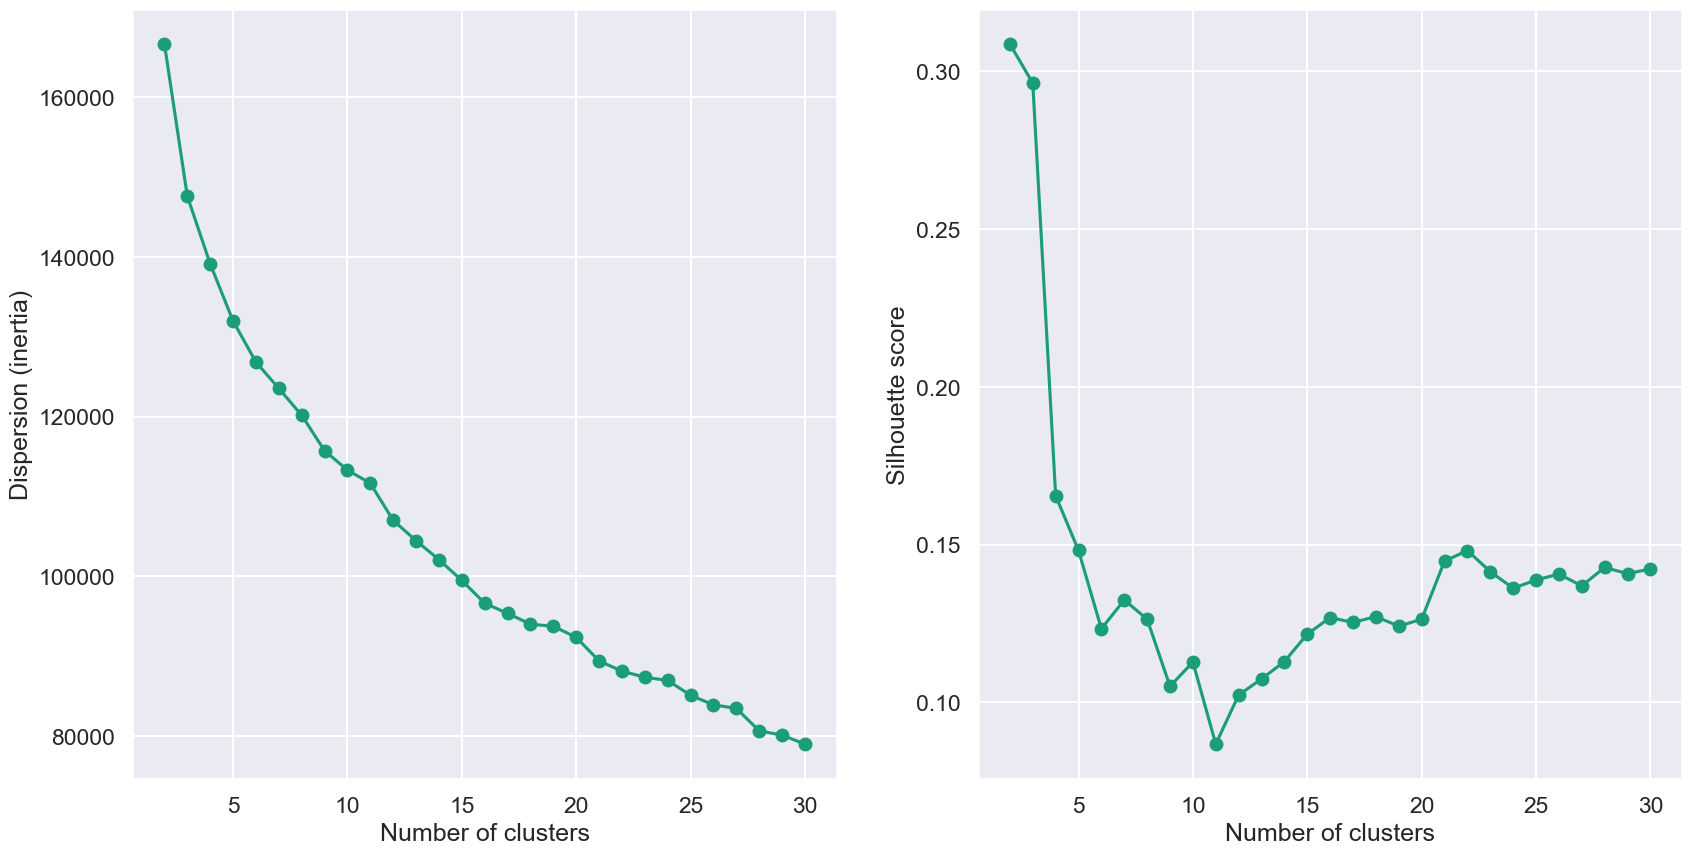

In [56]:
plot_inertia_and_silhouette(data_yj)

### Hierarchical

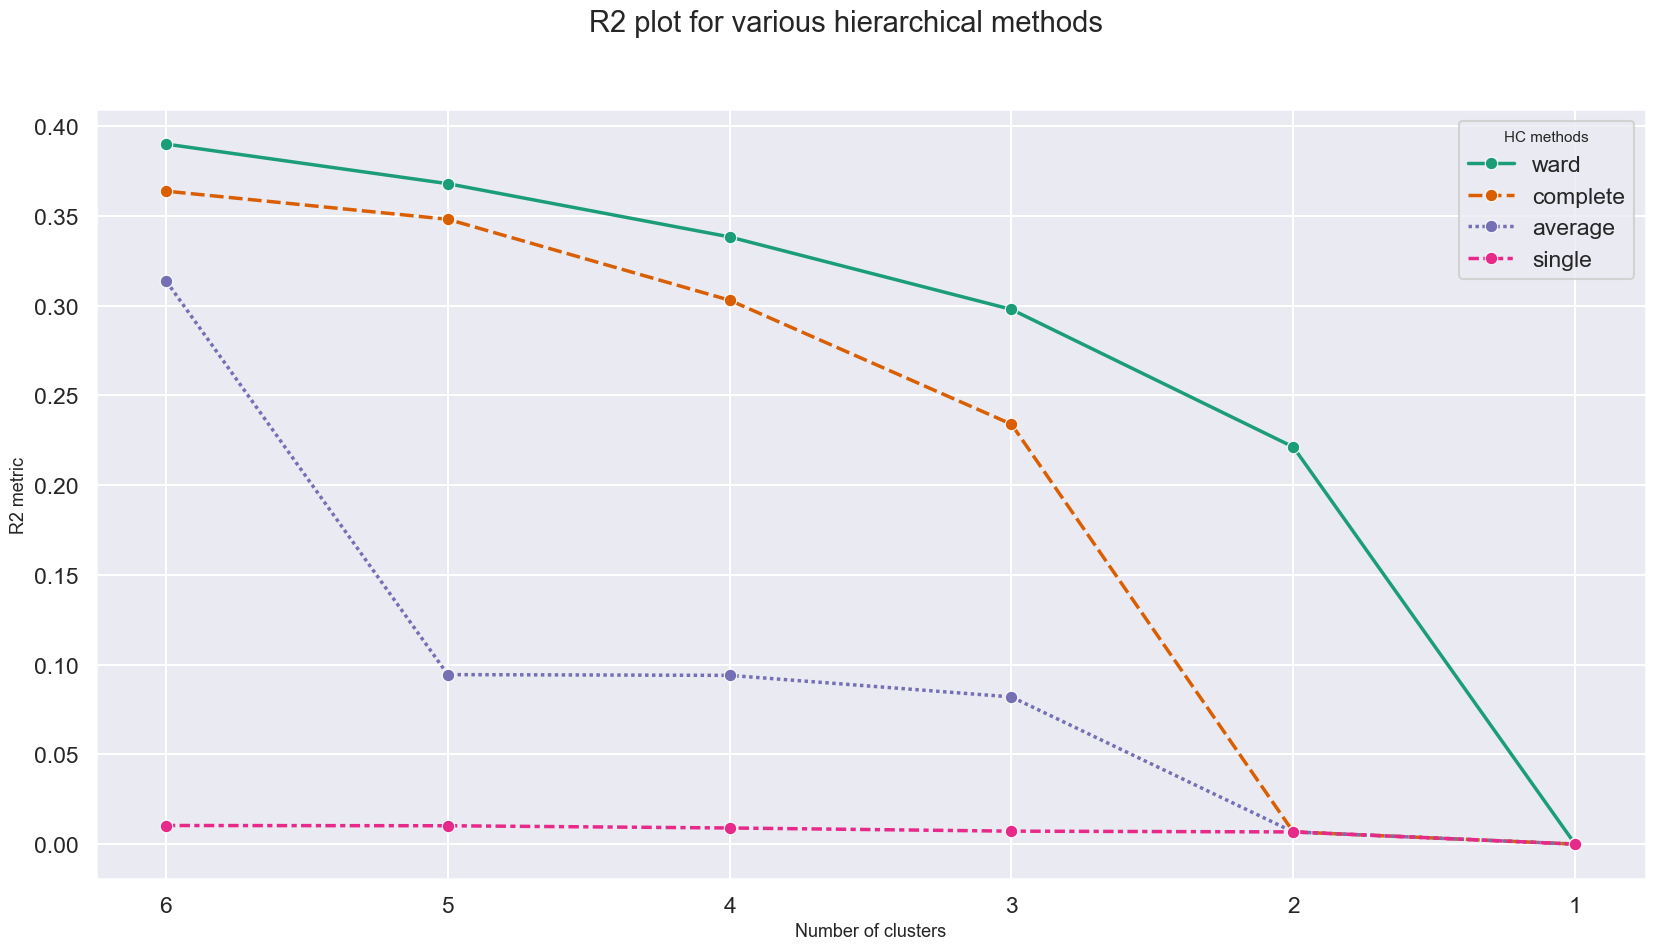

In [57]:
plot_r2_hc(data_yj)